## Business Goal

Supplement existing tech job market vision with insights and patterns from available community data. Expected positive outcomes:

1. Validate current conclusions about demographics, tech stacks, and junior career opportunities  in the tech industry
2. Explore and identify lesser-known types of companies hiring tech talent
3. Supplement the existing body of job market insights and form them into a coherent guide for tech industry newbies, allowing them to easily navigate available roles and opportunities

## Goal

1. Make a tech jobs map for students showing current market expectations and job requirements in terms of skills, salary, experience, titles, and potential for professional growth
2. Help students make data-driven decisions about their career path

## Tasks

### Job map: Make a detailed profile for each job title that includes the following information:

* hard and soft skills 
* salary
* career path
* experience
* self-development and learning
* educational background

### Employer profile: Research the following information about companies:

* industry
* company size
* team size
* roles/jobs
* stack and skills required
* salaries
* remote/part-time/full-time
* overtime
* demopraphics and social diversity

### Demographics and Social: How are the demographics of the tech industry distributed? How are the demographics of individual roles/positions distributed? Look at the following parameters:

* age
* gender
* race and ethnicity
* education
* disability status

### Data

### Demographics & Methodology survey from JetBrains:

* survey results <https://www.jetbrains.com/lp/devecosystem-2019/demographics/>
* raw data <https://blog.jetbrains.com/blog/2019/08/13/developer-ecosystem-survey-2019-raw-data-available/>

### Stack Overflow Developer survey:

* survey 2020 results <https://insights.stackoverflow.com/survey/2020>
* raw data <https://insights.stackoverflow.com/survey>

### The 2018 New Coder Survey:

* survey 2020 results <https://www.freecodecamp.org/news/the-2018-new-coder-survey-31-000-people-told-us-how-theyre-learning-to-code-and-getting-dev-jobs-e10feb9ed419/>
* raw data <https://github.com/freeCodeCamp/2018-new-coder-survey/find/master>

## Expected results

### JN

* Data preparation
* Exploratory data analysis
* Solutions for all three tasks
* Conclusions and recommendations

### Presentation in PDF

* Show your solution and briefly explain it
* (optional) Add any interesting findings on the research topic
* (optional) Add any interesting findings on the research topic

### Table of content

1. [Step 1. Data download](#1)
    * [1. Demographics & Methodology survey from JetBrains](#2)
    * [2. Stack Overflow Developer survey](#3)
    * [3. The 2018 New Coder Survey](#4)
2. [Step 2. Data preprocessing](#5)
    * [1. Demographics & Methodology survey from JetBrains](#6)
    * [2. Stack Overflow Developer survey](#7)
    * [3. The 2018 New Coder Survey](#8)     
3. [Step 3. Job map: Make a detailed profile for each job title that includes the following information](#9)
    * [1. Hard and soft skills](#10)
    * [2. Salary](#11)
    * [3. Career path](#12)
    * [4. Experience](#13)
    * [5. Self-development and learning](#14)
    * [6. Educational background](#15)    
    * [Job map: Conclusion](#9c)
4. [Step 4. Employer profile: Research the following information about companies](#16)
    * [1. Industry](#17)
    * [2. Company size](#18)
    * [3. Team size](#19)
    * [4. Roles/jobs](#20)
    * [5. Stack and skills required](#21)
    * [6. Salaries](#22) 
    * [7. Remote/part-time/full-time](#23) 
    * [8. Overtime](#24) 
    * [9. Demopraphics and social diversity](#25) 
    * [Employer profile: Conclusion](#16c)
5. [Step 5. Demographics and Social: How are the demographics of the tech industry distributed? How are the demographics of individual roles/positions distributed? Look at the following parameters](#26)
    * [1. Age](#27)
    * [2. Gender](#28)
    * [3. Race and ethnicity](#29)
    * [4. Education](#30)
    * [5. Disability status](#31)
    * [Demographics and Social: Conclusion](#26c)  
7. [Conclusion](#35)

## Step 1. Data download <a id="1"></a>

In [823]:
import pandas as pd
import plotly.graph_objects as go

from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import pylab as pylab
import re
import numpy as np
import seaborn as sns
import plotly.express as px
import nltk
from nltk.stem import WordNetLemmatizer
from matplotlib import cm

In [824]:
path = 'C:/Data/Practicum/Side Project 1/'

In [825]:
def purpose_lemma(row):
    
    wordnet_lemma = WordNetLemmatizer()
    
    lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in nltk.word_tokenize(row)]
    
    return lemmas


### Demographics & Methodology survey from JetBrains <a id="2"></a>

In [826]:
Ecosystem = pd.read_csv(path + 'DevEcosystem 2019 questions_outside.csv') # survey's questions

In [827]:
data = pd.read_csv(path + 'sharing_data_outside2019.csv', low_memory=False); # data

In [828]:
Ecosystem.shape

(263, 5)

In [829]:
data.shape

(19184, 1738)

#### List of questions of the survey from JetBrains

In [830]:
#list(data) 

### Stack Overflow Developer survey <a id="3"></a>

In [831]:
demogr = pd.read_csv(path + 'survey_results_public.csv') # data

In [832]:
demogr_schema = pd.read_csv(path + 'survey_results_schema.csv') # survey's questions

In [833]:
demogr.shape

(64461, 61)

In [834]:
demogr_schema.shape

(61, 2)

### The 2018 New Coder Survey <a id="4"></a>

In [835]:
survey = pd.read_csv(path + '2018-fCC-New-Coders-Survey-Data.csv') # data

In [836]:
survey_raw = pd.read_csv(path + '2018-new-coder-survey.csv')

In [837]:
survey.shape

(28397, 137)

#### List of questions of The 2018 New Coder Survey

In [838]:
#list(survey_raw) 

## Step 2. Data preprocessing  <a id="5"></a>

### Demographics & Methodology survey from JetBrains <a id="6"></a>

In [839]:
data = data.fillna('')

In [840]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19184 entries, 0 to 19183
Columns: 1738 entries, employment_status to channel
dtypes: object(1738)
memory usage: 254.4+ MB


#### Convert data types to Category

In [841]:
data = data.astype('category')

#### Combine and remove columns with one possible unswer.

In [842]:
job_role = data.columns[data.columns.str.contains('job_role')]

In [843]:
#list(job_role)

In [844]:
to_drop = ['job_role.Developer / Programmer /  Software Engineer',
 'job_role.DevOps Engineer / Infrastructure Developer / etc_',
 'job_role.DBA',
 'job_role.Architect',
 'job_role.Tester / QA Engineer',
 'job_role.Technical support',
 'job_role.Business analyst',
 'job_role.Team Lead',
 'job_role.Systems analyst',
 'job_role.Product Manager',
 'job_role.UX / UI Designer',
 'job_role.CIO / CEO / CTO',
 'job_role.Marketing Manager',
 'job_role.Developer Advocate',
 'job_role.Instructor / Teacher / Tutor / etc_',
 'job_role.Other']
data = data.drop(columns=to_drop)


In [845]:
data = (data.loc[data['job_role.Data analyst / Data engineer/ Data scientist']
                 =='Data analyst / Data engineer/ Data scientist']
       )

In [846]:
def columns_drop(df, column_name):
    columns_to_drop = df.columns[df.columns.str.contains(column_name)]
    df[column_name] = df[columns_to_drop].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
    df = df.drop(columns=columns_to_drop)
    return df
    

In [847]:
data = columns_drop(data, 'age_range')

In [848]:
data = columns_drop(data, 'company_size')

In [849]:
data = columns_drop(data, 'it_experience')

In [850]:
data = columns_drop(data, 'code_weekends')

In [851]:
data = columns_drop(data, 'visit_meetups')

In [852]:
#data.sample(5)

### Stack Overflow Developer survey <a id="7"></a>

In [853]:
#demogr.sample(5)

In [854]:
#demogr_schema[0:50]

In [855]:
demogr['DevType'] = demogr['DevType'].fillna('No answer')

In [856]:
demogr_data = (demogr[demogr['DevType'].
                       str.contains(
                           'Engineer, data|Data scientist or machine learning specialist|Data or business analyst')])

In [857]:
test_list = pd.DataFrame(demogr_data['DevType'].value_counts())

In [858]:
def data_roles(lemmas):
    
    if 'Data scientist or machine learning specialist' in lemmas: 
        return  'Data scientist or machine learning specialist'
    if 'Data or business analyst' in lemmas : 
        return  'Data or business analyst'
    if 'Database administrator' in lemmas: 
        return  'Database administrator'
    if 'Engineering manager' in lemmas: 
        return  'Engineering manager'
    else: 
        return  'Engineer, data'
    
    

In [859]:
demogr_data['job_role'] = demogr_data['DevType'].apply(data_roles);

<ipython-input-859-193b8a94cad9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [860]:
demogr_data['job_role'].value_counts()


Data scientist or machine learning specialist    3988
Data or business analyst                         2727
Engineer, data                                   1434
Database administrator                            427
Engineering manager                               150
Name: job_role, dtype: int64

#### Substitute NaN values

In [861]:
demogr_data = demogr_data.fillna('No answer')

#### I change the data types for colomns

In [862]:
category_columns = ['MainBranch', 'Hobbyist', 'Country', 'EdLevel', 
                    'Employment', 'Ethnicity', 'Gender', 'JobSat', 'JobSeek', 'NEWDevOps', 
                   'NEWDevOpsImpt', 'NEWEdImpt', 'NEWLearn', 'NEWOnboardGood',
                   'NEWOtherComms', 'NEWOvertime', 'NEWPurpleLink', 'OpSys', 'OrgSize', 'PurchaseWhat', 'Sexuality',
                   'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'Trans']

In [863]:
string_columns = ['DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'JobFactors', 
                  'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 
                 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith',
                 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWPurchaseResearch', 'NEWSOSites', 'NEWStuck',
                 'PlatformDesireNextYear', 'PlatformWorkedWith', 'UndergradMajor', 'WebframeDesireNextYear',
                 'WebframeWorkedWith', 'YearsCode', 'Age1stCode', 'YearsCodePro']

In [864]:
integer_columns = ['Age']

In [865]:
demogr_data[category_columns] = demogr_data[category_columns].astype('category')

In [866]:
demogr_data[string_columns] = demogr_data[string_columns].astype('str')

In [867]:
demogr_data[integer_columns] = demogr_data[integer_columns].astype('str')

### The 2018 New Coder Survey  <a id="8"></a>

In [868]:
#survey.dtypes

In [869]:
#list(survey_raw) 

In [870]:
new_coder = survey[['is_software_dev', 'is_first_dev_job', 'months_job_search', 'job_pref', 
                    'job_intr_datasci', 'job_intr_dataengn', 'when_appl_job', 'expected_earn', 'job_lctn_pref',
                   'reasons_to_code', 'age', 'gender', 'country_live', 'is_ethnic_minority', 'school_degree', 
                    'school_major', 'curr_field', 'is_recv_disab_bnft', ]]

## Step 3. Job map: Make a detailed profile for each job title that includes the following information <a id="9"></a>

In [871]:
data.shape[0]

870

In [872]:
demogr_data.shape[0]

8726

In [873]:
new_coder = survey[['job_intr_dataengn', 'job_intr_datasci']]

In [874]:
survey['job_intr_dataengn'].loc[survey['job_intr_dataengn'] == 1].sum()

2607.0

In [875]:
survey['job_intr_datasci'].loc[survey['job_intr_datasci'] == 1].sum()

3542.0

### Hard and soft skills <a id="10"></a>

In [876]:
def count (df, count_name):
    columns_list = df.columns[df.columns.str.contains(count_name)]
    count_data = df[columns_list]
    count_data = count_data.replace(to_replace ='', value =np.nan)
    count_data = count_data.count(0)
    count_data = pd.DataFrame(count_data)
    count_data = count_data.reset_index() 
    count_data.columns=[count_name, 'number']
    count_data = count_data.sort_values(by='number', ascending=False)
    count_data = count_data.replace(regex=[count_name +'.'], value='')
    count_data['% of total'] = ((count_data['number']/count_data['number'].sum())*100).round(1)
    return count_data

In [877]:
app_type_money_count = count(data, 'app_type_money')

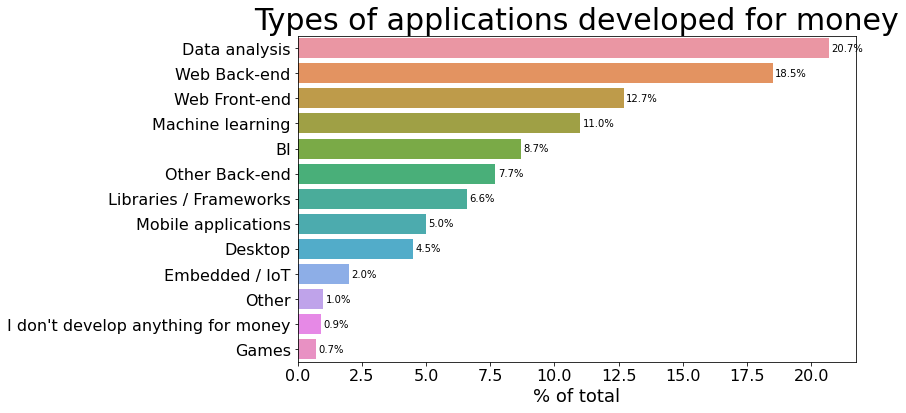

In [878]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.rcParams["axes.labelsize"] = 18

ax = (
    sns.barplot(
    x="% of total", 
    y="app_type_money", 
    data=app_type_money_count)
    
     )

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 0.1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}%'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment                
            
plt.title("Types of applications developed for money", fontsize=30)  
plt.xticks(rotation=0)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel(None);

In [879]:
OpSys_stack = demogr_data[['job_role','OpSys']]

In [880]:
OpSys_stack_pivot = OpSys_stack.pivot_table(
    index='OpSys', columns='job_role', values='job_role', aggfunc='size').reset_index()

In [881]:
fig = make_subplots(
    rows=2, cols=2,   
    specs=[[{'type':'domain'}, {'type':'domain'}],
         [{'type':'domain'}, {'type':'domain'}]],
           
    subplot_titles=['DA/BA', 'DS/ML', 'DBA', 'DE']
)
fig.add_trace(go.Pie(
    labels=OpSys_stack_pivot['OpSys'], 
    values=OpSys_stack_pivot['Data or business analyst'],
    hole=0.8,
    name="Data or business analyst"), 1, 1)
fig.add_trace(go.Pie(
    labels=OpSys_stack_pivot['OpSys'], 
    values=OpSys_stack_pivot['Data scientist or machine learning specialist'], 
    hole=0.8,
    name="Data scientist or machine learning specialist"), 1, 2)
fig.add_trace(go.Pie(
    labels=OpSys_stack_pivot['OpSys'], 
    values=OpSys_stack_pivot['Database administrator'], 
    hole=0.8,
    name="Database administrator"), 2, 1)
fig.add_trace(go.Pie(
    labels=OpSys_stack_pivot['OpSys'], 
    values=OpSys_stack_pivot['Engineer, data'], 
    hole=0.8,
    name="Engineer, data"), 2, 2)

fig.update_layout(title_text='Primary Operating System',
                 height = 650,
                 width = 650,
                 autosize = False, 
                 annotations=[dict(text='DA/BA', x=0.23, y=0.78, font_size=20, showarrow=False),
                              dict(text='DS/ML', x=0.78, y=0.78, font_size=20, showarrow=False),
                              dict(text='DBA', x=0.225, y=0.16, font_size=20, showarrow=False),
                              dict(text='DE', x=0.775, y=0.16, font_size=20, showarrow=False), 
                              ]
                 )
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.5)))
fig.show()

### Tools

### Which of the following tools do you regularly use?

In [882]:
regularly_tools_count = count(data, 'regularly_tools')

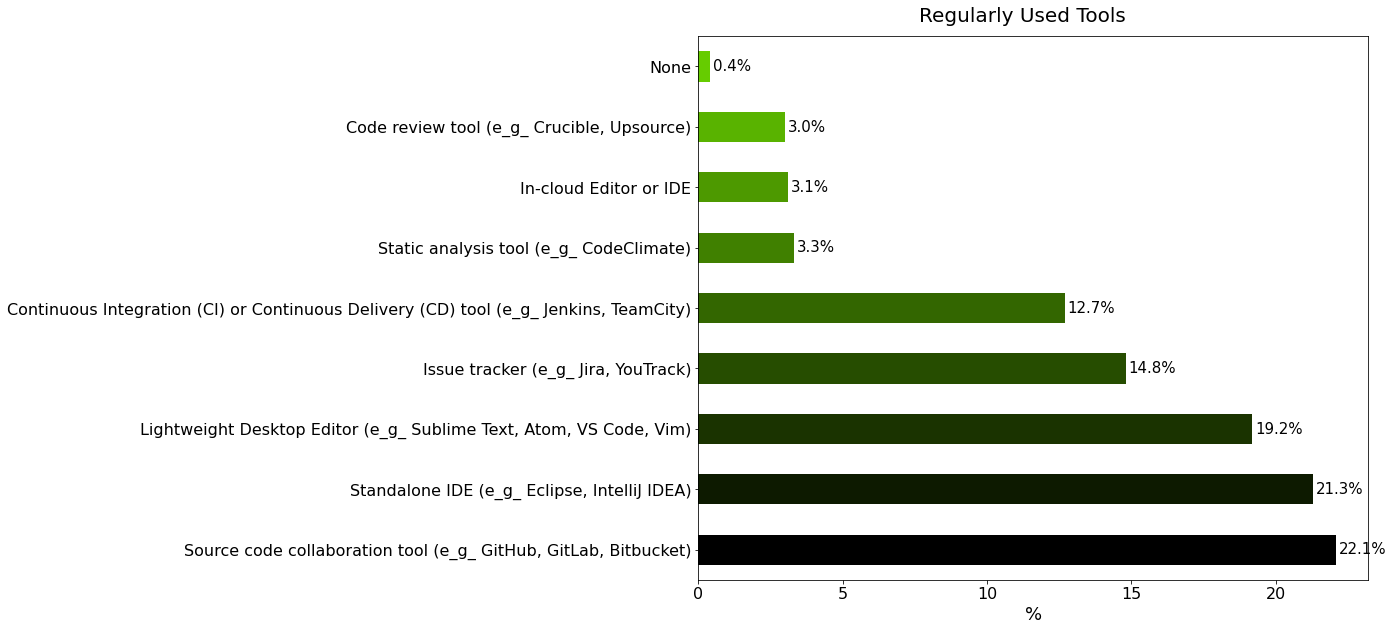

In [883]:
colors = [(x/20.0, x/10.0, 0.0) for x in range(len(regularly_tools_count))]
ax = regularly_tools_count.plot.barh(y='% of total', x='regularly_tools', figsize=(12, 10),  
    fontsize=(16), legend=None, color = colors)
for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 0.1,      
            p.get_y() + p.get_height() / 2, 
            '{:1.1f}%'.format(width), 
            ha = 'left',   
            va = 'center',
            fontsize=15)         
plt.figtext(.5,.9,'Regularly Used Tools', fontsize=20, ha='center')
plt.xlabel('%')
plt.ylabel('');

# Programming languages

In [884]:
lang_stack = demogr_data[['job_role', 'LanguageWorkedWith']]

In [885]:
lang_stack_pivot = (lang_stack.set_index(['job_role'])
                    .LanguageWorkedWith.str.split(';\s*', expand=True)
                    .stack()
                    .reset_index()
                    .pivot_table(index=['job_role'], columns=0, fill_value='', aggfunc='size')
                    )

In [886]:
lang_stack_pivot = lang_stack_pivot.transpose()

In [887]:
lang_stack_pivot = lang_stack_pivot.reset_index()
lang_stack_pivot.columns = ['Language', 'Data or business analyst', 'Data scientist or machine learning specialist', 
                           'Database administrator', 'Engineer, data', 'Engineering manager']

In [888]:
#color={"speed": "red", "lifespan": "green"}
lang_stack_pivot['Data or business analyst, %'] = round(((lang_stack_pivot['Data or business analyst']
                                                          /lang_stack_pivot['Data or business analyst']
                                                          .sum())*100), 2)
lang_stack_pivot['Data scientist or machine learning specialist, %']= round(
    ((lang_stack_pivot['Data scientist or machine learning specialist']
                                                          /lang_stack_pivot['Data scientist or machine learning specialist']
                                                          .sum())*100), 2)
lang_stack_pivot['Database administrator, %'] = round(((lang_stack_pivot['Database administrator']
                                                          /lang_stack_pivot['Database administrator']
                                                          .sum())*100), 2)
lang_stack_pivot['Data engineer, %'] = round(((lang_stack_pivot['Engineer, data']
                                                          /lang_stack_pivot['Engineer, data']
                                                          .sum())*100), 2)
lang_stack_pivot['Engineering manager, %'] = round(((lang_stack_pivot['Engineering manager']
                                                          /lang_stack_pivot['Engineering manager']
                                                          .sum())*100), 2)

In [889]:
DA_BA = (lang_stack_pivot[['Language', 'Data or business analyst, %']]
         .sort_values(by='Data or business analyst, %', ascending=False).head(5)
         .set_index('Language')
        )
DS = (lang_stack_pivot[['Language', 'Data scientist or machine learning specialist, %']]
         .sort_values(by='Data scientist or machine learning specialist, %', ascending=False).head(5)
         .set_index('Language')
        )
DA = (lang_stack_pivot[['Language', 'Database administrator, %']]
         .sort_values(by='Database administrator, %', ascending=False).head(5)
         .set_index('Language')
        )
DE = (lang_stack_pivot[['Language', 'Data engineer, %']]
         .sort_values(by='Data engineer, %', ascending=False).head(5)
         .set_index('Language')
        )

In [890]:
all = pd.concat([DA_BA, DS, DA, DE], axis=1)
all = all.transpose()
all = all.reset_index() 
all['index'] = all['index'].str.replace(', %', '')
all = all.set_index('index')

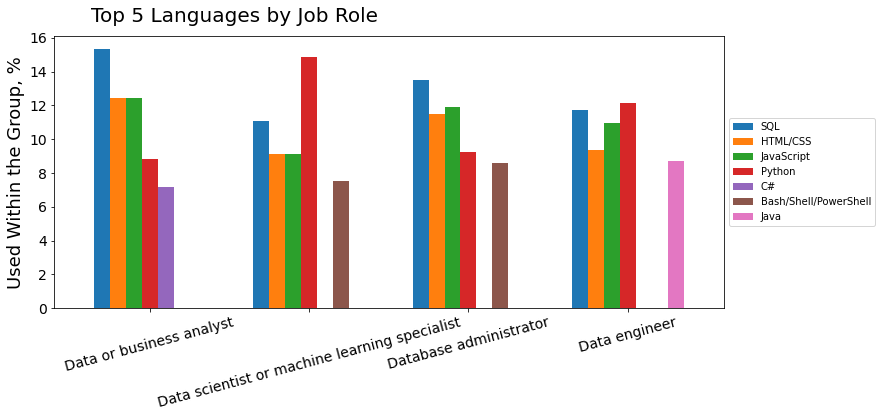

In [891]:
#colors = 
all.plot.bar(subplots=None, figsize=(12, 5),  
    fontsize=(14), width=0.7, legend=True)
plt.figtext(.5,0.92,'Top 5 Languages by Job Role', fontsize=20, ha='right')
plt.ylabel('Used Within the Group, %')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(None)
plt.xticks(rotation = 15);

In [892]:
primary_lang_count = count(data, 'primary_proglang')

In [893]:
def lang(lemmas):
    
    if 'SQL' in lemmas: 
        return  'SQL (and other SQL extensions)'
    if 'Python' in lemmas: 
        return  'Python'
    if 'JavaScript' in lemmas: 
        return  'JavaScript'
    if 'Java' in lemmas: 
        return  'Java'
    if 'PHP' in lemmas: 
        return  'PHP'
    if 'C#' in lemmas: 
        return  'C#'
    if 'HTML / CSS' in lemmas: 
        return  'HTML / CSS'
    if 'Shell scripting languages(bash/shell/powershell)' in lemmas: 
        return  'Shell scripting languages'
    if 'Scala' in lemmas: 
        return  'Scala'
    if 'C++' in lemmas: 
        return  'C++'
    else:
        return  'Other Languages'

In [894]:
primary_lang_count['name'] = primary_lang_count['primary_proglang'].apply(lang)

In [895]:
fig_primary_lang = go.Figure(
    data=[go.Pie(labels=primary_lang_count['name'], values=primary_lang_count['number'], 
                 pull=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
                hole=0.6)])
fig_primary_lang.update_layout(title_text='Primary languages', font_size=20, uniformtext_minsize=15, 
                               uniformtext_mode='hide',
                              legend=dict(font=dict(size=15)),
                              annotations=[dict(text='Primary languages', x=0.5, y=0.50, font_size=20, showarrow=False)])
fig_primary_lang.update_traces(marker=dict(line=dict(color='#000000', width=0.5)))

fig_primary_lang.show()

In [896]:
adopt_proglang = count(data, 'adopt_proglang')
adopt_proglang = adopt_proglang.iloc[[0, 5]]
adopt_proglang['%_all'] = ((adopt_proglang['number']/adopt_proglang['number'].sum())*100).round(1)
adopt_proglang.loc[adopt_proglang['adopt_proglang'] == 'Planning to adopt / migrate to other language(s) - Write in', 
                   'adopt_proglang'] = 'Yes, planning to adopt / migrate to other language(s)'

In [897]:
fig_adopt_proglang = go.Figure(
    data=[go.Pie(labels=adopt_proglang['adopt_proglang'], values=adopt_proglang['number'], 
                 hole = 0.7)
                 ])


fig_adopt_proglang.update_layout(title='Plans to adopt new language', 
                                 font_size=20,
                                 uniformtext_minsize=15, 
                                 uniformtext_mode='hide',
                                 legend=dict(font=dict(size=15)),
                                 annotations=[dict(text='Plans to adopt new language', 
                                                   x=0.5, y=0.50, font_size=16, showarrow=False)])
fig_adopt_proglang.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=0.5)))
                                 
fig_adopt_proglang.show()

###	Please rank your primary programming languages by frequency of use:

In [898]:
proglang_rank_count = count(data, 'proglang_rank')
proglang_rank_count.loc[proglang_rank_count['proglang_rank'] == 'SQL(PL/SQL, T-SQL and otherprogramming extensions over SQL)', 
                   'proglang_rank'] = 'SQL(and other)'
proglang_rank_count.loc[proglang_rank_count['proglang_rank'] == 'Shell scripting languages(bash/shell/powershell)', 
                   'proglang_rank'] = 'Shell languages'

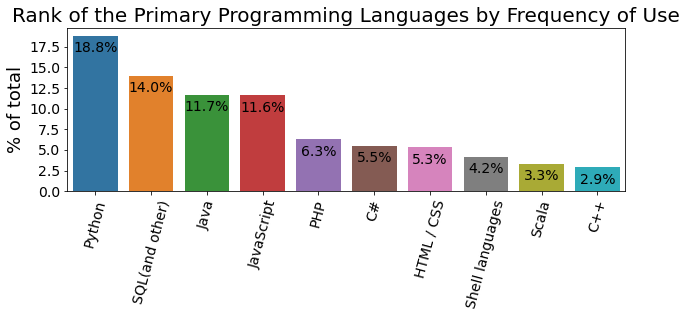

In [899]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.rcParams["axes.labelsize"] = 18
ax = sns.barplot(
    x="proglang_rank", y="% of total", data=proglang_rank_count.head(10))
for p in ax.patches:
    height = p.get_height()    
    ax.text(p.get_x() + p.get_width() / 2, 
            height -1.5,
            '{:1.1f}%'.format(height), 
            ha = 'center',   
            va = 'center',
            fontsize=14) 
plt.title("Rank of the Primary Programming Languages by Frequency of Use", fontsize=20)    
plt.xticks(rotation=75)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(None);

### Which IDEs / Editors do you regularly use?

In [900]:
ides_count = count(data, 'ides')
ides_count.head()

,ides,number,% of total
1,IntelliJ IDEA,365,11.0
8,PyCharm,359,10.8
12,VS Code (Visual Studio Code),355,10.7
22,IPython/Jupyter Notebook,258,7.8
9,Vim,257,7.7


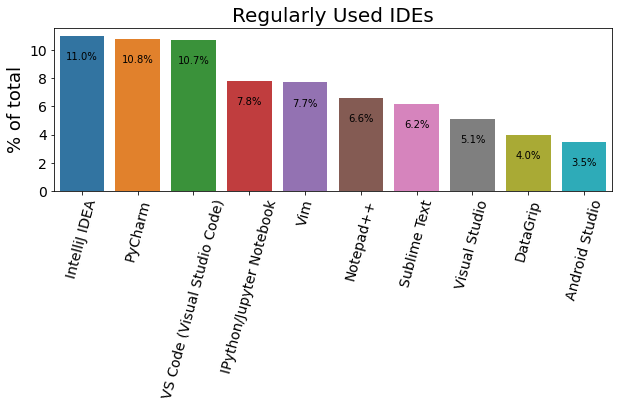

In [901]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.rcParams["axes.labelsize"] = 18
ax = sns.barplot(
    x="ides", y="% of total", data=ides_count.head(10))

for p in ax.patches:
    height = p.get_height()    
    ax.text(p.get_x() + p.get_width() / 2, 
            height -1.5,
            '{:1.1f}%'.format(height), 
            ha = 'center',   
            va = 'center',
            fontsize=10) 
plt.title("Regularly Used IDEs", fontsize=20)
plt.xticks(rotation=75)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(None);

### Python: Which IDE/editor do you use the most?

In [902]:
python_ide_count = count(data, 'python_ide')

In [903]:
python_ide_count.loc[python_ide_count['number'] < 20, 'python_ide'] = 'Other'

In [904]:
fig_primary_ide = go.Figure(
    data=[go.Pie(labels=python_ide_count['python_ide'], values=python_ide_count['number'], 
                 pull=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], hole=0.8)])
fig_primary_ide.update_layout(uniformtext_minsize=15, uniformtext_mode='hide',
                              legend=dict( font=dict( size=16,)),
                              annotations=[dict(text='IDE/editor used', 
                                                   x=0.5, y=0.5, font_size=18, showarrow=False)])
fig_primary_ide.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=0.5)))
                              
fig_primary_ide.show()

### DB

In [905]:
db_adopt = count(data, 'db_adopt')
db_adopt = db_adopt.iloc[[0, 3]]
db_adopt['% of total'] = ((db_adopt['number']/db_adopt['number'].sum())*100).round(1)
db_adopt.loc[db_adopt['db_adopt'] == 'Yes, planning to adopt / migrate to other database(s) - Write in', 
                   'db_adopt'] = 'Yes, planning to adopt / migrate to other database(s)'

In [906]:
fig_primary_ide = go.Figure(
    data=[go.Pie(labels=db_adopt['db_adopt'], values=db_adopt['number'], 
                 hole=0.7)])
fig_primary_ide.update_layout(uniformtext_minsize=15, uniformtext_mode='hide',
                              legend=dict( font=dict( size=15,)),
                              annotations=[dict(text='Plans to adopt new DB', 
                                                   x=0.5, y=0.5, font_size=18, showarrow=False)])
fig_primary_ide.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=0.5)))
fig_primary_ide.show()

In [907]:
database_stack = demogr_data[['job_role', 'DatabaseWorkedWith']]

In [908]:
database_stack = (database_stack.set_index(['job_role'])
                    .DatabaseWorkedWith.str.split(';\s*', expand=True)
                    .stack()
                    .reset_index()
                    .pivot_table(index=['job_role'], columns=0, fill_value='', aggfunc='size')
                    )

In [909]:
database_stack = database_stack.apply(lambda x: x*100/sum(x), axis=1)
database_stack = database_stack.transpose().reset_index()
database_stack.columns=['Database', 'Data or business analyst', 'Data scientist or machine learning specialist', 
                        'Database administrator', 'Engineer, data', 'Engineering manager']
database_stack = database_stack.sort_values(by=['Data or business analyst'], 
                                            ascending=False)

In [910]:
database_stack = database_stack.transpose()
database_stack.columns = database_stack.iloc[0]
database_stack = database_stack[1:]

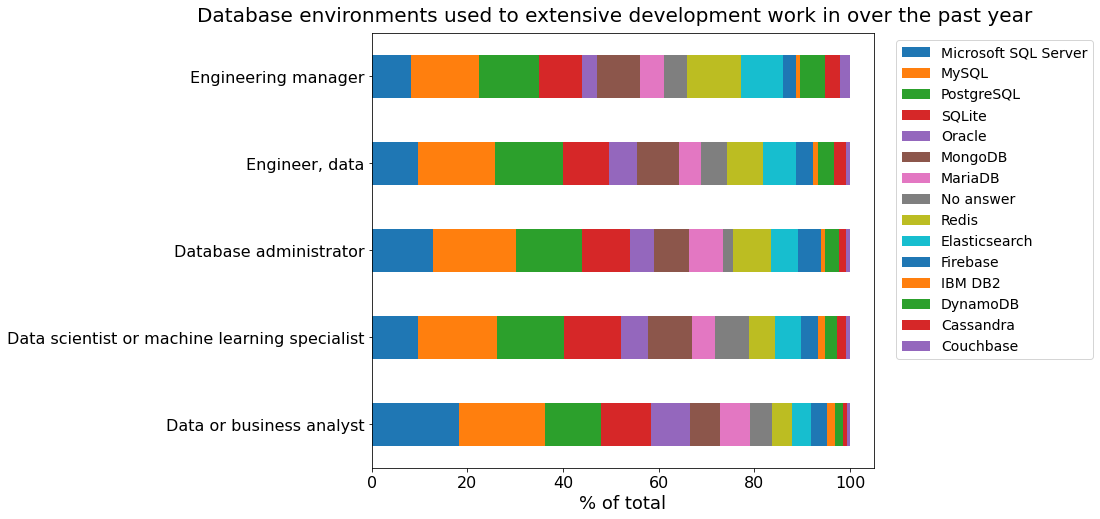

In [911]:
database_stack.plot.barh(
    stacked=True, rot=0, figsize=(9,8), 
    fontsize=(16),
)
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1.),
           fontsize=14)
plt.figtext(.5,.9,
            'Database environments used to extensive development work in over the past year', 
            fontsize=20, 
            ha='center')
plt.xticks(rotation=0)
plt.ylabel(None)
plt.xlabel('% of total');

### Salary <a id="11"></a>

In [912]:
def salary(lemmas):
    
    if '100,001 - 110,000' in lemmas or '110,001 - 120,000' in lemmas or '120,001 - 140,000' in lemmas: 
        return  '100K - 140K'
    if '140,001 - 160,000' in lemmas or '160,001 - 180,000' in lemmas or '180,001 - 200,000' in lemmas: 
        return  '140K - 200K'
    if 'More than 200,000' in lemmas or '160,001 - 180,000' in lemmas or '180,001 - 200,000' in lemmas: 
        return  'More than 200K'
    if 'Don’t want to disclose' in lemmas: 
        return  'Don’t want to disclose'
    else:
        return  'Less than 100K'

In [913]:
#data['salary'].value_counts()

In [914]:
data['salary_category'] = data['salary'].apply(salary)

In [915]:
salary = data[['country', 'salary_category']]

In [916]:
salary_usa = salary.query('country == "United States"')
salary_usa_piv = salary_usa.pivot_table(index=['salary_category'], aggfunc='size').reset_index()
salary_usa_piv.columns = ['salary_category', 'number']

In [917]:
fig_salary_usa = go.Figure(
    data=[go.Pie(labels=salary_usa_piv['salary_category'], 
                 values=salary_usa_piv['number'], hole = 0.8,
                 )])
fig_salary_usa.update_layout(uniformtext_minsize=15, uniformtext_mode='hide',
                              legend=dict( font=dict( size=15,)),
                              annotations=[dict(text='US Data Industry Salaries', 
                                                   x=0.5, y=0.5, font_size=18, showarrow=False)])
fig_salary_usa.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=0.5))) 
fig_salary_usa.show()

In [918]:
salary_stack = demogr_data[['job_role', 'ConvertedComp', 'Country']]
salary_stack_usa = salary_stack.loc[salary_stack['Country'] == 'United States']
salary_stack_usa = salary_stack_usa.loc[salary_stack_usa['ConvertedComp'] != 'No answer']
salary_stack_usa['ConvertedComp'] = salary_stack_usa['ConvertedComp'].astype('int')

I believe that $2000000 salary is not real.

In [919]:
salary_stack_usa.loc[salary_stack_usa['ConvertedComp'] == 2e+06, 'ConvertedComp'] = 200000

In [920]:
salary_stack_usa_pivot = salary_stack_usa.pivot_table(
    index='job_role', 
    values='ConvertedComp', 
    aggfunc='mean').reset_index()

In [921]:
salary_stack_usa = salary_stack_usa.loc[salary_stack_usa['ConvertedComp'] != 0]

In [922]:
salary_stack_usa['Comp_thousands'] = salary_stack_usa['ConvertedComp']/1000
salary_stack_usa['Comp_thousands'].describe()

count    1548.000000
mean      156.268432
std       207.462275
min         0.048000
25%        81.425000
50%       115.000000
75%       160.000000
max      1920.000000
Name: Comp_thousands, dtype: float64

In [923]:
# to remove outliers, I remove salaries highers than $250,000

In [924]:
salary_stack_usa = salary_stack_usa.loc[salary_stack_usa['Comp_thousands'] <300]
salary_stack_usa['job_role'] = salary_stack_usa['job_role'].str.replace('Data scientist or machine learning specialist', 
                                                            'Data scientist/Machine learning')
salary_stack_usa

,job_role,ConvertedComp,Country,Comp_thousands
110,Data or business analyst,65000,United States,65.0
113,"Engineer, data",78800,United States,78.8
123,Data scientist/Machine learning,200000,United States,200.0
168,Data scientist/Machine learning,130000,United States,130.0
238,Data or business analyst,130000,United States,130.0
...,...,...,...,...
63998,Data scientist/Machine learning,100000,United States,100.0
64013,Data scientist/Machine learning,200000,United States,200.0
64057,Data scientist/Machine learning,200000,United States,200.0
64113,"Engineer, data",225000,United States,225.0


### 75% of Data Professional have salaries less than $160K

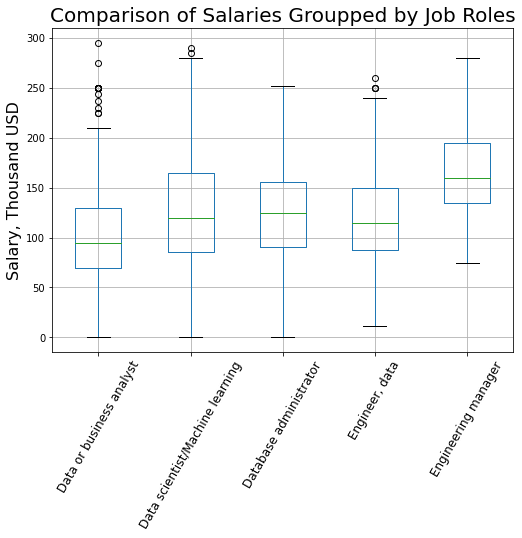

In [925]:
fig, ax = plt.subplots(figsize=(8,6))
salary_stack_usa.boxplot(column='Comp_thousands', by='job_role', ax=ax)
plt.title("Comparison of Salaries Groupped by Job Roles", fontsize=(20))
plt.suptitle('')
plt.xlabel(None)
plt.ylabel('Salary, Thousand USD', fontsize=16);
plt.xticks(rotation=60, fontsize=12);

### Career path <a id="12"></a>

In [926]:
career_stack = demogr_data[['job_role', 'Employment', 'JobSat', 'JobSeek']]

In [927]:
career_stack_Employment = career_stack.pivot_table(index='Employment', columns='job_role',aggfunc='size').reset_index()
career_stack_JobSat = career_stack.pivot_table(index='job_role', columns='JobSat',aggfunc='size')
career_stack_JobSeek = career_stack.pivot_table(index='job_role', columns='JobSeek',aggfunc='size')

In [928]:
fig = make_subplots(
    rows=2, cols=2,   
    specs=[[{'type':'domain'}, {'type':'domain'}],
         [{'type':'domain'}, {'type':'domain'}]],
           
    subplot_titles=['DA/BA', 'DS/ML', 'DBA', 'DE']
)
fig.add_trace(go.Pie(
    labels=career_stack_Employment['Employment'], 
    values=career_stack_Employment['Data or business analyst'], 
    scalegroup='one',
    hole=0.7,
    name="Data or business analyst"), 1, 1)
fig.add_trace(go.Pie(
    labels=career_stack_Employment['Employment'], 
    values=career_stack_Employment['Data scientist or machine learning specialist'], 
    scalegroup='one',
    hole=0.6,
    name="Data scientist or machine learning specialist"), 1, 2)
fig.add_trace(go.Pie(
    labels=career_stack_Employment['Employment'], 
    values=career_stack_Employment['Database administrator'], 
    scalegroup='one',
    hole=0.55,
    name="Database administrator"), 2, 1)
fig.add_trace(go.Pie(
    labels=career_stack_Employment['Employment'], 
    values=career_stack_Employment['Engineer, data'], 
    scalegroup='one',
    hole=0.7,
    name="Engineer, data"), 2, 2)

fig.update_layout(title_text='Current Employment Status',
                 font_size = 16,             
                 annotations=[dict(text='DA/BA', x=0.23, y=0.78, font_size=12, showarrow=False),
                              dict(text='DS/ML', x=0.78, y=0.78, font_size=12, showarrow=False),
                              dict(text='DBA', x=0.225, y=0.16, font_size=10, showarrow=False),
                              dict(text='DE', x=0.775, y=0.16, font_size=12, showarrow=False), 
                              ]
                 )
fig.update_traces(marker=dict(line=dict(color='#000000', width=0.5)))
fig.show()

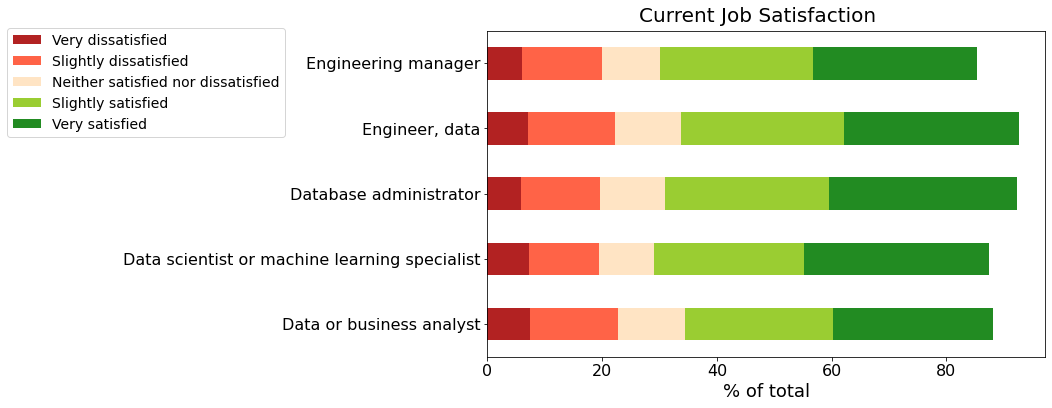

In [929]:
career_stack_JobSat = career_stack_JobSat.apply(lambda x: x*100/sum(x), axis=1)
career_stack_JobSat = career_stack_JobSat[['Very dissatisfied', 
                                           'Slightly dissatisfied', 
                                           'Neither satisfied nor dissatisfied',
                                          'Slightly satisfied', 'Very satisfied']]
colors1 = ['firebrick', 'tomato', 'bisque', 'yellowgreen', 'forestgreen']
career_stack_JobSat.plot.barh(
    stacked=True, rot=0, figsize=(10,6), 
    fontsize=(16),
    color=colors1
)
plt.legend(loc='upper right', bbox_to_anchor=(-0.35, 1.03),
           fontsize=14)
plt.figtext(.5,.9,
            'Current Job Satisfaction', 
            fontsize=20, 
            ha='center')
plt.ylabel(None)
plt.xlabel('% of total');

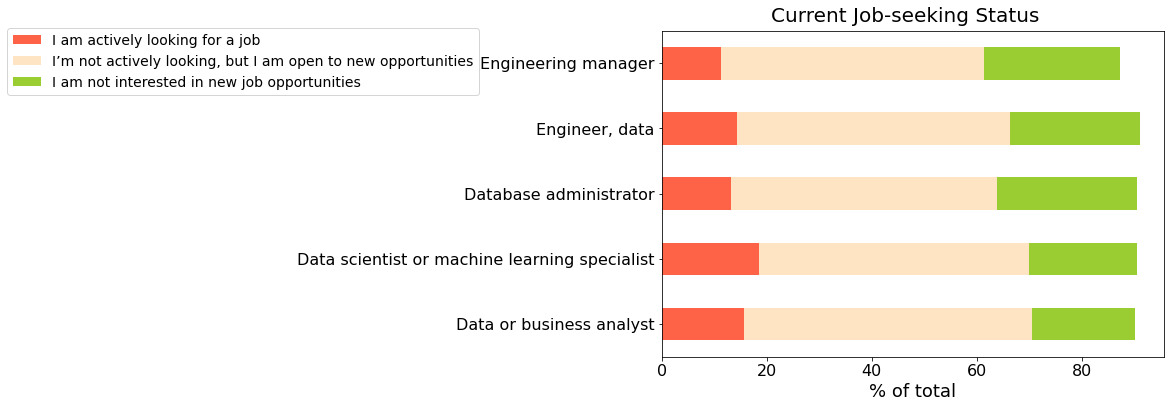

In [930]:
career_stack_JobSeek = career_stack_JobSeek.apply(lambda x: x*100/sum(x), axis=1)
career_stack_JobSeek = career_stack_JobSeek[['I am actively looking for a job', 
                                           'I’m not actively looking, but I am open to new opportunities', 
                                           'I am not interested in new job opportunities']]
colors2 = ['tomato', 'bisque', 'yellowgreen']
career_stack_JobSeek.plot.barh(
    stacked=True, rot=0, figsize=(9,6), 
    fontsize=(16),
    color=colors2
)
plt.legend(loc='upper right', bbox_to_anchor=(-0.35, 1.03),
           fontsize=14)
plt.figtext(.5,.9,
            'Current Job-seeking Status', 
            fontsize=20, 
            ha='center')
plt.ylabel(None)
plt.xlabel('% of total');

### Experience <a id="13"></a>

In [931]:
it_experience = data[['it_experience']]

In [932]:
it_experience_pivot = it_experience.pivot_table(index='it_experience', aggfunc='size').reset_index()
it_experience_pivot.columns = ['experience', 'number']

In [933]:
Fig_it_experience = go.Figure(
    data=[go.Pie(labels=it_experience_pivot['experience'],
                 values=it_experience_pivot['number'], 
                 pull=[0.0, 0, 0, 0.0, 0.0, 0.0],
                 hole=0.7,
                 )])
Fig_it_experience.update_layout(uniformtext_minsize=14, uniformtext_mode='hide',
                              legend=dict(font=dict(size=15)),
                              annotations=[dict(text='Data Prifessionals working experience', 
                                                   x=0.5, y=0.5, font_size=12, showarrow=False)])
Fig_it_experience.update_traces(marker=dict(colors=colors, line=dict(color='#000', width=0.5)))
Fig_it_experience.show()

In [934]:
age_stack = demogr_data[['job_role', 'Age', 'Age1stCode']]

age_stack = age_stack.replace(to_replace ='No answer', value ='0')
age_stack['Age'] = age_stack['Age'].astype('float')

age_stack.loc[age_stack['Age1stCode'] == 'Younger than 5 years', 'Age1stCode'] = 4
age_stack.loc[age_stack['Age1stCode'] == 'Older than 85', 'Age1stCode'] = 85
age_stack['Age1stCode'] = age_stack['Age1stCode'].astype('float')

In [935]:
def age_category(Age):
    if Age == 0:
        return 'no answer'
    if 0 < Age <= 17:
        return '17 or younger'
    if 17 < Age <= 20:
        return '18-20'
    if 21 < Age <= 29:
        return '21-29'
    if 30 < Age <= 39:
        return '30-39'
    if 40 < Age <= 49:
        return '40-49'
    if 50 < Age <= 59:
        return '50-59'
    if 60 < Age:
        return '60 or older'

age_stack['age_category'] = age_stack['Age'].apply(age_category)
age_stack['age1st_category'] = age_stack['Age1stCode'].apply(age_category)

In [936]:
Age1stCode_pivot = age_stack.pivot_table(index='job_role', columns='age1st_category', aggfunc='size') #didn't use it

### Self-development and learning <a id="14"></a>

In [937]:
self_development = data[['learn_time']]
self_development = self_development.replace(to_replace ='', value =np.nan)
self_development_pivot = (
    self_development
    .query(
    'learn_time != ""')
    .pivot_table(index='learn_time', aggfunc='size')
)    
self_development_pivot = pd.DataFrame(self_development_pivot)
self_development_pivot.columns = ['number']
self_development_pivot['% of total'] = (self_development_pivot['number']/self_development_pivot['number'].sum())*100
self_development_pivot = self_development_pivot.loc[['Less than 1 hour a week', '1 – 2 hours a week',
                                                    '3 – 8 hours a week', '9 – 16 hours a week',
                                                    '17 – 32 hours a week', '32 hours a week or more'],:]
self_development_pivot

,number,% of total
learn_time,,
Less than 1 hour a week,29,7.712766
1 – 2 hours a week,107,28.457447
3 – 8 hours a week,176,46.808511
9 – 16 hours a week,50,13.297872
17 – 32 hours a week,11,2.925532
32 hours a week or more,3,0.797872


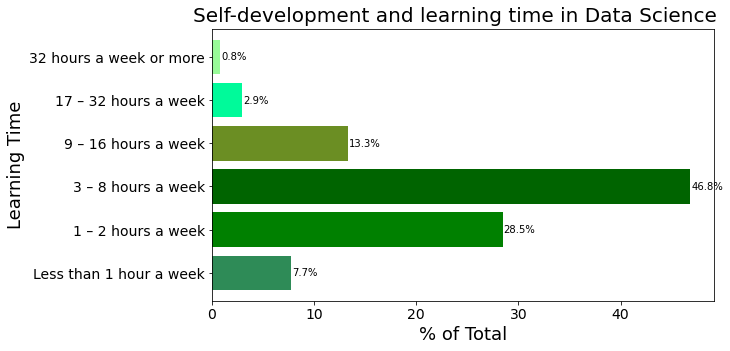

In [938]:
colors3 = ['seagreen', 'green','darkgreen', 'olivedrab' ,'mediumspringgreen', 'palegreen']

ax = self_development_pivot['% of total'].plot.barh(figsize=(9, 5),  
    fontsize=(14), legend=None, color=colors3,  width=0.8)

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 0.1,      
            p.get_y() + p.get_height() / 2, 
            '{:1.1f}%'.format(width), 
            ha = 'left',   
            va = 'center',
            fontsize=10)  
plt.figtext(.5,.9,'Self-development and learning time in Data Science', fontsize=20, ha='center')
plt.xlabel('% of Total')
plt.ylabel('Learning Time');

In [939]:
NEWLearn = demogr_data[['job_role', 'NEWLearn']]
NEWLearn_p = NEWLearn.pivot_table(index='job_role' , columns='NEWLearn', aggfunc='size')
NEWLearn_p = NEWLearn_p.apply(lambda x: x*100/sum(x), axis=1)

In [940]:
NEWLearn_p = NEWLearn_p[['Every few months', 'Once a year', 'Once every few years','Once a decade']]

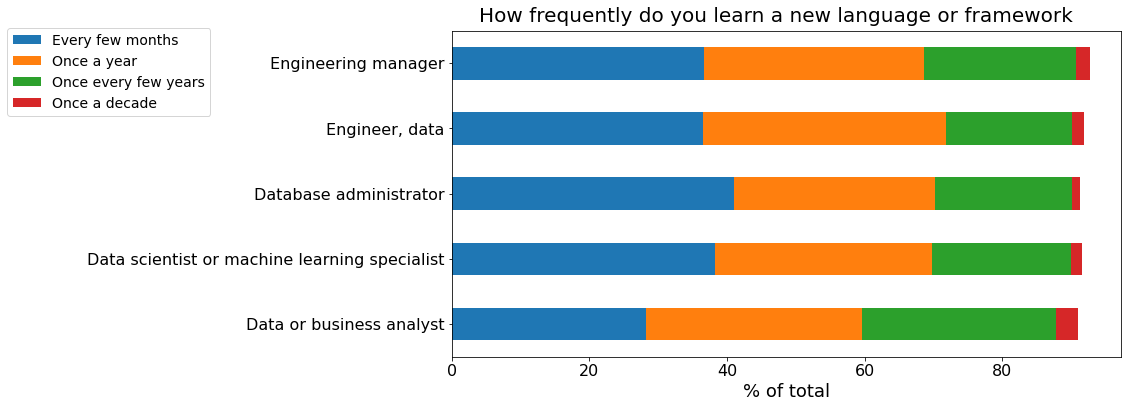

In [941]:
NEWLearn_p.plot.barh(
    stacked=True, 
    rot=0, 
    figsize=(12,6), 
    fontsize=(16))
plt.legend(loc='upper right', 
           bbox_to_anchor=(-0.35, 1.03),
           fontsize=14,
           )
plt.figtext(.5,.9,
            'How frequently do you learn a new language or framework', 
            fontsize=20, 
            ha='center')
plt.ylabel(None)
plt.xlabel('% of total');

### Educational background <a id="15"></a>

In [942]:
EdLevel = demogr_data[['job_role', 'EdLevel', 'NEWEdImpt', 'Country']]
EdLevel_us = EdLevel.loc[EdLevel['Country'] == 'United States']
EdLevel_ad_p = EdLevel_us.pivot_table(index='job_role' , columns='EdLevel', aggfunc='size')
EdLevel_ad_p = EdLevel_ad_p.drop(columns='No answer')
EdLevel_ad_p.columns = ['Associate degree', 'Bachelor’s degree', 'No formal education', 
                        'Master’s degree', 'Other doctoral degree', 'Primary/elementary school',
                       'Professional degree', 'Secondary school', 'Some college/university study w/o degree']
EdLevel_ad_Imp = EdLevel_us.pivot_table(index='job_role' , columns='NEWEdImpt', aggfunc='size')
EdLevel_ad_Imp = EdLevel_ad_Imp.drop(columns='No answer')
EdLevel_ad_p = EdLevel_ad_p.apply(lambda x: x*100/sum(x), axis=1)

In [943]:
EdLevel_ad_p = EdLevel_ad_p[['Associate degree','Professional degree',
                             'Bachelor’s degree','Master’s degree','Other doctoral degree',
                             'Primary/elementary school', 'Secondary school', 'No formal education', 
                             'Some college/university study w/o degree', ]]

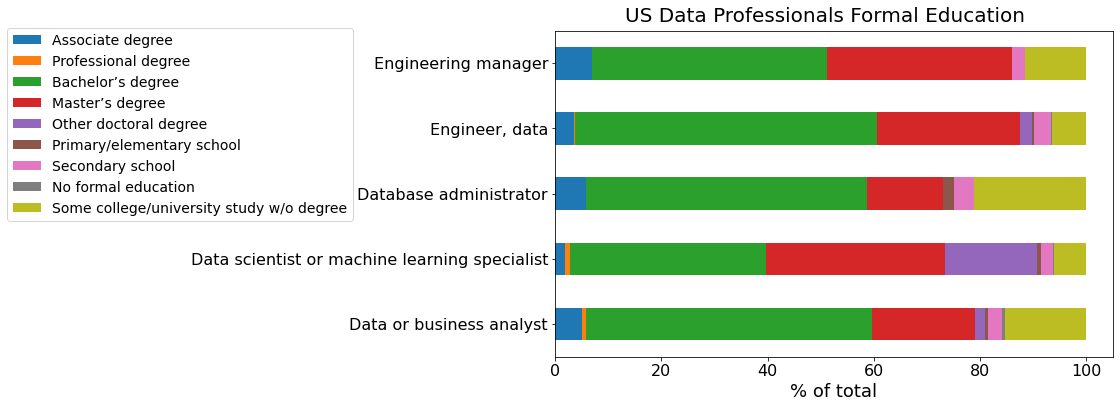

In [944]:
EdLevel_ad_p.plot.barh(
    stacked=True, 
    rot=0, 
    figsize=(10,6), 
    fontsize=(16))
plt.legend(
    loc='upper right', 
    bbox_to_anchor=(-0.35, 1.03),
    fontsize=14, )
plt.figtext(.5,.9,
            'US Data Professionals Formal Education', 
            fontsize=20, 
            ha='center')
plt.ylabel(None)
plt.xlabel('% of total');

In [945]:
EdLevel_ad_Imp = EdLevel_ad_Imp.apply(lambda x: x*100/sum(x), axis=1)
EdLevel_ad_Imp = EdLevel_ad_Imp[['Not at all important/not necessary','Somewhat important','Fairly important',
                                 'Very important','Critically important']]

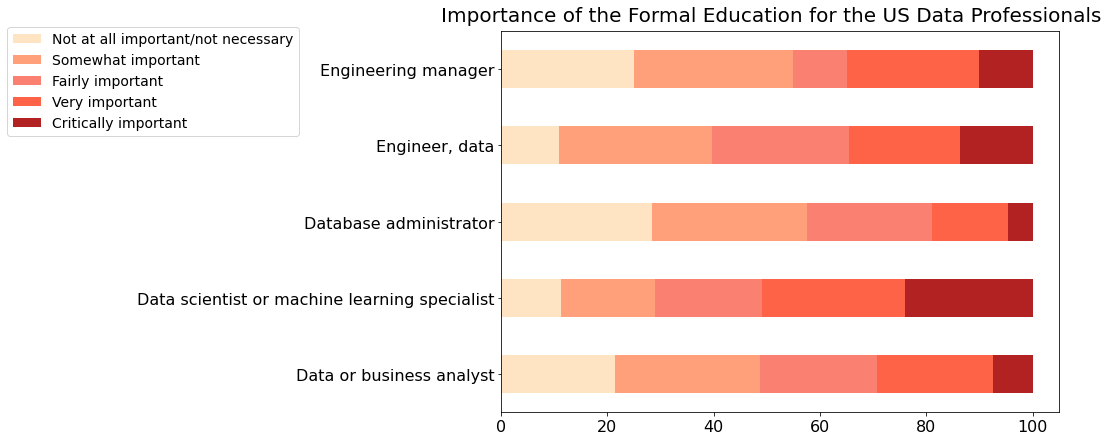

In [946]:
colors4 = ['bisque', 'lightsalmon', 'salmon', 'tomato', 'firebrick']
EdLevel_ad_Imp.plot.barh(
    stacked=True, 
    rot=0, 
    figsize=(10,7), 
    fontsize=(16),
    color=colors4)
plt.legend(
    loc='upper right', 
    bbox_to_anchor=(-0.35, 1.03),
    fontsize=14, )
plt.figtext(.5,.9,
            'Importance of the Formal Education for the US Data Professionals', 
            fontsize=20, 
            ha='center')
plt.ylabel(None);

##  Job map: Conclusion <a id="9c"></a> 

### Hard and soft skills 

**Three most popular operating systems:**

* Windows
* Linux
* MacOS

**Three most popular languages by professions:**

* Python
* SQL
* Javascript
* HTML/CSS

**Three most popular Databases:**

* MySQL
* PostgreSQL
* Microsoft SQL Server / SQLIte


### Salary

* The highest paying professions are: DBA and Data Scientist with average salaries around $160-170,000 

* Minimal average salary is around 120,000 for DA/BA


### Career Path

* The most popular data related job paths: DS/Machine Learning, DA/BA, Data Engineer
* Most Data Professions employed full time
* 11.7% of DS are Independent contractors
* 15.3% of DA/BA are Independent contractors
* Great majority of data professionals are satisfied with the job
* Great majority of data professionals are not actively job looking a new job or not interested in new job


### Experience

* About 7.6% of Data Professionals have less than 1 year or no experience.
* 10% f Data    Professionals have l1-2 years of experience


### Self-development and Learning

* Most Data Professionals learn from 1 to 8 hours a week.
* Most Data Professionals learn new language or data frame every few months or at least once a year.


### Educational Background

* Most Data Professionals have Bachelor degree
* DS have the biggest share of PhD and Master degrees
* DA/BA and DBA have the biggest share of workers w/o degree
* Formal education is the most important for Data Scientist




## Step 4. Employer profile: Research the following information about companies <a id="16"></a> 

### Industry <a id="17"></a> 

Companies which have 'Data analyst / Data engineer/ Data scientist' positions

In [947]:
industry = data[[i for i in list(data) if 'it_core' in i or 'sectors_it' in i or 'sectors_nonit' in i ]]
industry = industry.replace(to_replace ='', value =np.nan)

In [948]:
it_core = data.pivot_table(index='it_core', aggfunc='size')
it_core = pd.DataFrame(it_core)
it_core.columns = ['number']
it_core = it_core.drop(['']).reset_index()

In [949]:
it_core_fig = go.Figure(
    data=[go.Pie(labels=it_core['it_core'], values=it_core['number'], 
                 hole=0.7)])
it_core_fig.update_layout(uniformtext_minsize=15, uniformtext_mode='hide',
                              legend=dict(x=0.7, y=1, font=dict( size=15)),
                              annotations=[dict(text='Is IT the core business?', 
                                                   x=0.5, y=0.5, font_size=18, showarrow=False)])
it_core_fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=0.5)))
it_core_fig.show()

In [950]:
sectors_it_count = count(data, 'sectors_it')
sectors_it_count = sectors_it_count.set_index('sectors_it')

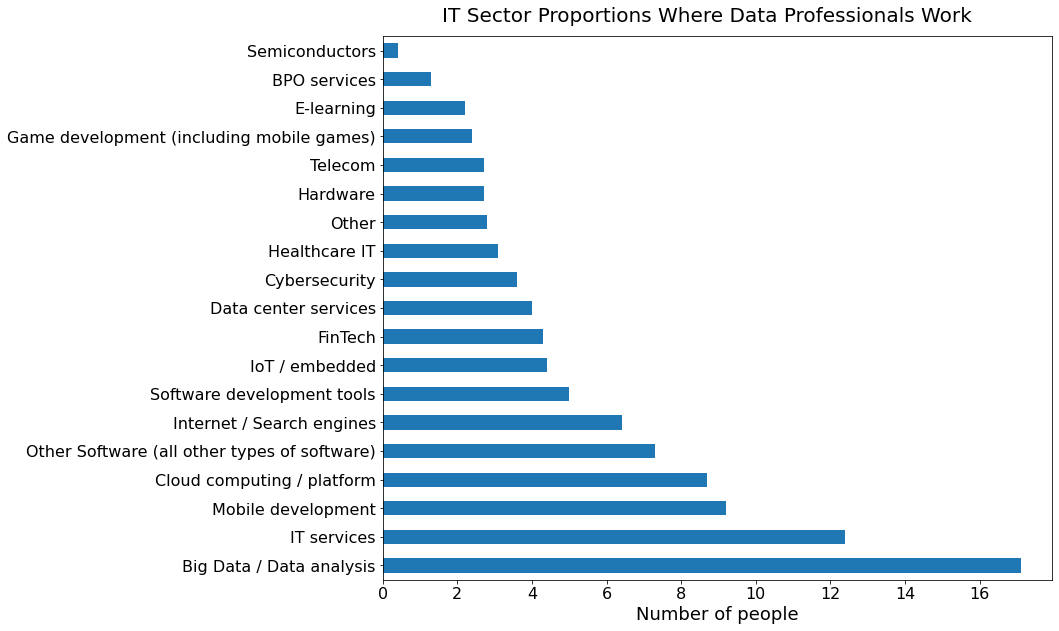

In [951]:
sectors_it_count['% of total'].plot.barh(
    figsize=(12, 10), fontsize=(16))

plt.figtext(.5,.9,
            'IT Sector Proportions Where Data Professionals Work', 
            fontsize=20, 
            ha='center')
plt.ylabel(None)
plt.xlabel('Number of people');

In [952]:
sectors_nonit_count = count(data, 'sectors_nonit')
sectors_nonit_count = sectors_nonit_count.set_index('sectors_nonit')

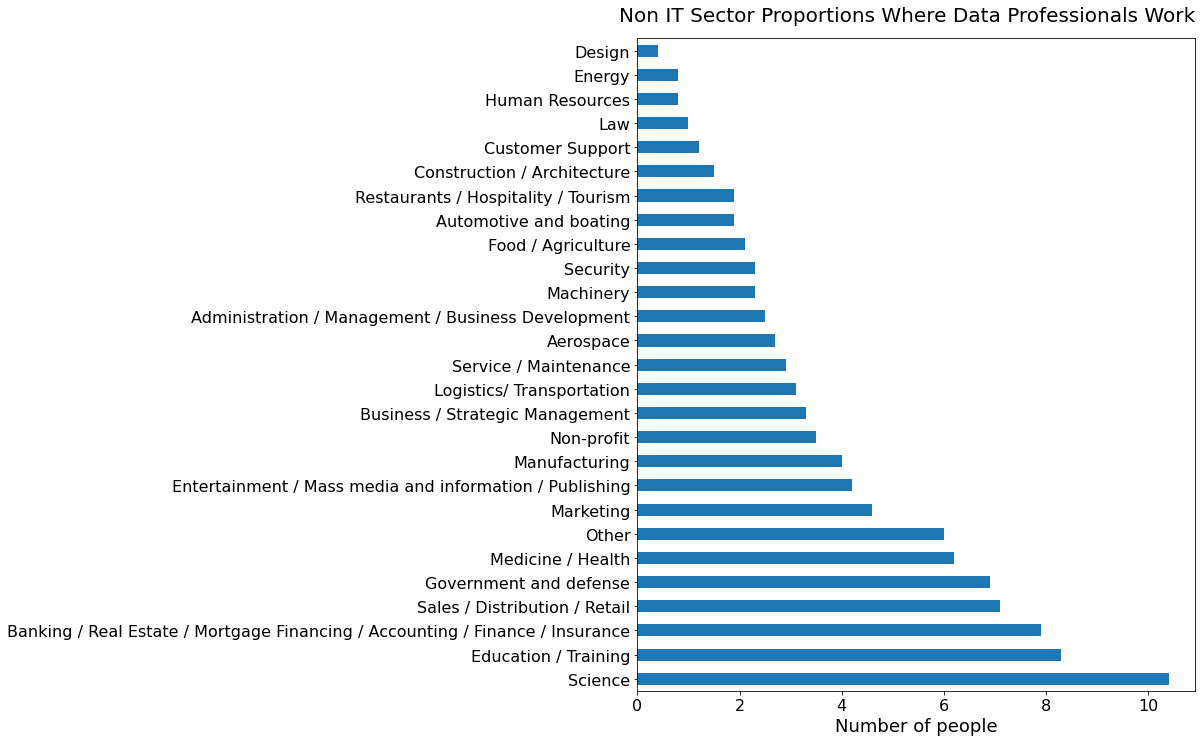

In [953]:
sectors_nonit_count['% of total'].plot.barh(
    figsize=(10, 12), fontsize=(16))
plt.figtext(.5,.9,
            'Non IT Sector Proportions Where Data Professionals Work', 
            fontsize=20, 
            ha='center')
plt.ylabel(None)
plt.xlabel('Number of people');

### Company size <a id="18"></a> 

In [954]:
company_size = data['company_size']
company_size = pd.DataFrame(company_size)
company_size = company_size.loc[company_size['company_size'] !='']
company_size = pd.DataFrame(company_size.value_counts())
company_size = company_size.loc[['Not sure', 'Just me', '2-10', '11-50',
                                    '51-500','501-1,000','1,001-5,000','More than 5,000'],:]
company_size.columns=['number']
company_size = company_size.reset_index()
company_size['% of total'] = ((company_size['number']/(company_size['number'].sum()))*100).round(1)

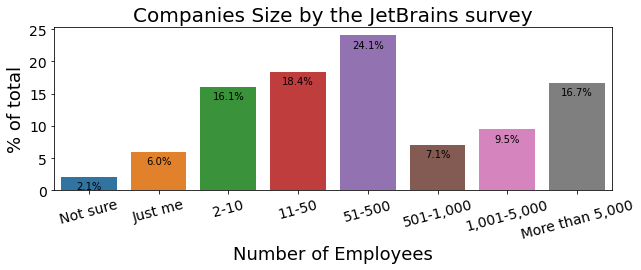

In [955]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.rcParams["axes.labelsize"] = 18
ax = sns.barplot(
    x="company_size", y="% of total", data=company_size)

for p in ax.patches:
    height = p.get_height()    
    ax.text(p.get_x() + p.get_width() / 2, 
            height -1.5,
            '{:1.1f}%'.format(height), 
            ha = 'center',   
            va = 'center',
            fontsize=10) 
plt.title("Companies Size by the JetBrains survey", fontsize=20)
plt.xticks(rotation=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of Employees');

In [956]:
company_size_stack = demogr_data[['OrgSize']]
company_size_stack = company_size_stack.loc[company_size_stack['OrgSize'] !='No answer']
company_size_stack = pd.DataFrame(company_size_stack['OrgSize'].value_counts())
company_size_stack = company_size_stack.loc[['No answer',
                                      'Just me - I am a freelancer, sole proprietor, etc.',
                                      '2 to 9 employees', 
                                      '10 to 19 employees',
                                      '20 to 99 employees',
                                      '100 to 499 employees',
                                      '500 to 999 employees',
                                      '1,000 to 4,999 employees',
                                      '5,000 to 9,999 employees',
                                      '10,000 or more employees'],:]

company_size_stack = company_size_stack.loc[company_size_stack['OrgSize']!=0]
company_size_stack['% of total'] = (company_size_stack['OrgSize']/company_size_stack['OrgSize'].sum())*100
company_size_stack = company_size_stack.reset_index()
company_size_stack['index'] = company_size_stack['index'].str.replace(' employees', '')
company_size_stack['index'] = company_size_stack['index'].str.replace('- I am a freelancer, sole proprietor, etc.', '')

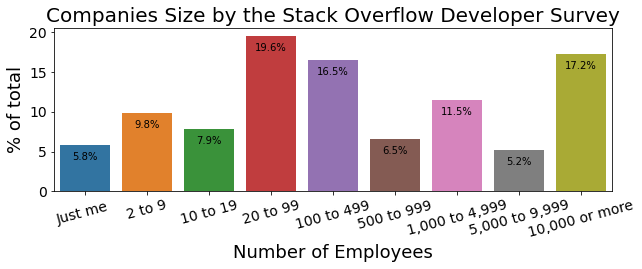

In [957]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.rcParams["axes.labelsize"] = 18
ax = sns.barplot(
    x="index", y="% of total", data=company_size_stack)

for p in ax.patches:
    height = p.get_height()    
    ax.text(p.get_x() + p.get_width() / 2, 
            height -1.5,
            '{:1.1f}%'.format(height), 
            ha = 'center',   
            va = 'center',
            fontsize=10) 
plt.title("Companies Size by the Stack Overflow Developer Survey", fontsize=20)
plt.xticks(rotation=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of Employees');

### Team size <a id="19"></a> 

In [958]:
team_size = data[['team_size']]
team_size = pd.DataFrame(team_size['team_size'].value_counts())
team_size = team_size.loc[team_size['team_size']!=0]
team_size = team_size.reset_index()
team_size = team_size.loc[[2, 0, 1, 3, 4, 5], :]
team_size['% of total'] = (team_size['team_size']/team_size['team_size'].sum())*100
team_size['index'] = team_size['index'].str.replace(' people', '')
team_size['index'] = team_size['index'].str.replace('I work on my projects independently', 'Just me')

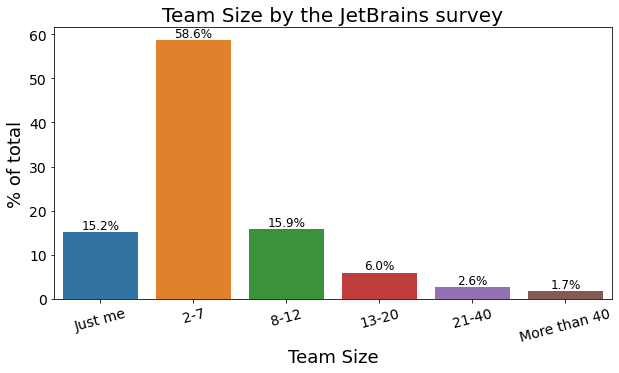

In [959]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.rcParams["axes.labelsize"] = 18
ax = sns.barplot(
    x="index", y="% of total", data=team_size)

for p in ax.patches:
    height = p.get_height()    
    ax.text(p.get_x() + p.get_width() / 2, 
            height +1.5,
            '{:1.1f}%'.format(height), 
            ha = 'center',   
            va = 'center',
            fontsize=12) 
plt.title("Team Size by the JetBrains survey", fontsize=20)
plt.xticks(rotation=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Team Size');

### Roles/jobs <a id="20"></a> 

In [960]:
position_level = data[['position_level']]
position_level = pd.DataFrame(position_level['position_level'].value_counts())
position_level = position_level.drop(['Other', ''], axis=0)

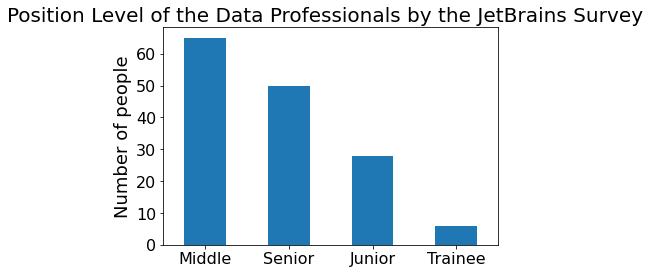

In [961]:
position_level.plot.bar(rot=0, fontsize=(16), legend=None)

#figsize=(10, 12), fontsize=(16))
plt.figtext(.5,.9,
            'Position Level of the Data Professionals by the JetBrains Survey', 
            fontsize=20, 
            ha='center')
plt.ylabel('Number of people');

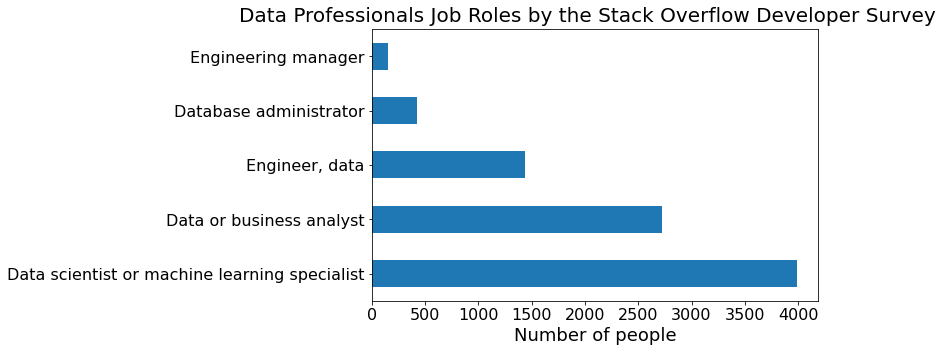

In [962]:
roles_stack = demogr_data['job_role']
roles_stack.value_counts().plot.barh(
    figsize=(8, 5), fontsize=(16), legend=None)

plt.figtext(.5,.9,
            'Data Professionals Job Roles by the Stack Overflow Developer Survey', 
            fontsize=20, 
            ha='center')
plt.xlabel('Number of people');

### Stack and skills required <a id="21"></a> 

In [963]:
hours_code_job = data['hours_code_job']
hours_code_job_count = pd.DataFrame(hours_code_job.value_counts())
hours_code_job_count = hours_code_job_count.drop([''], axis=0)
hours_code_job_count = hours_code_job_count.reset_index()

In [964]:
hours_code_job_count_fig = go.Figure(
    data=[go.Pie(labels=hours_code_job_count['index'], values=hours_code_job_count['hours_code_job'], 
                 hole=0.7)])
hours_code_job_count_fig.update_layout(uniformtext_minsize=15, uniformtext_mode='hide',
                              legend=dict(x=0.9, y=1, font=dict( size=15)),
                              annotations=[dict(text='How Many Code Hours a Week?', 
                                                   x=0.5, y=0.5, font_size=14, showarrow=False)])
hours_code_job_count_fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=0.5)))
hours_code_job_count_fig.show()

#### Lerning Skills

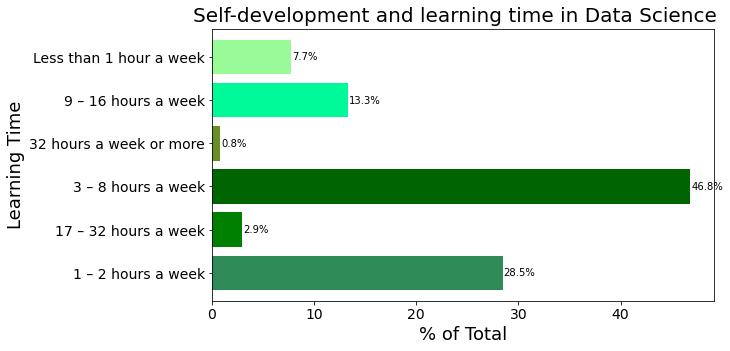

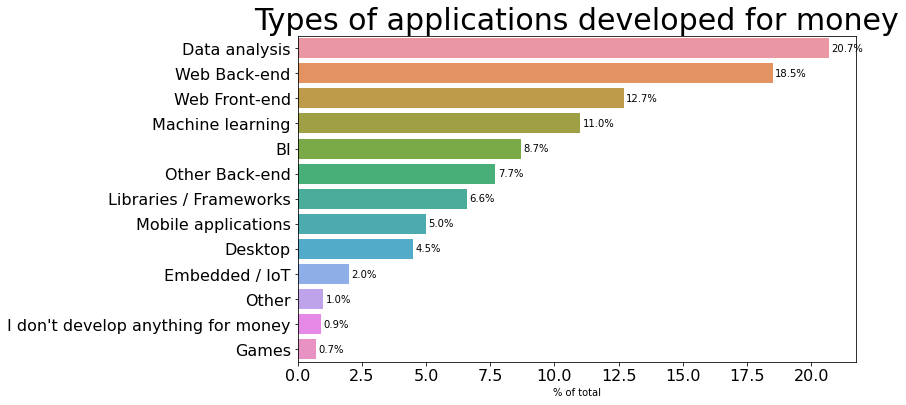

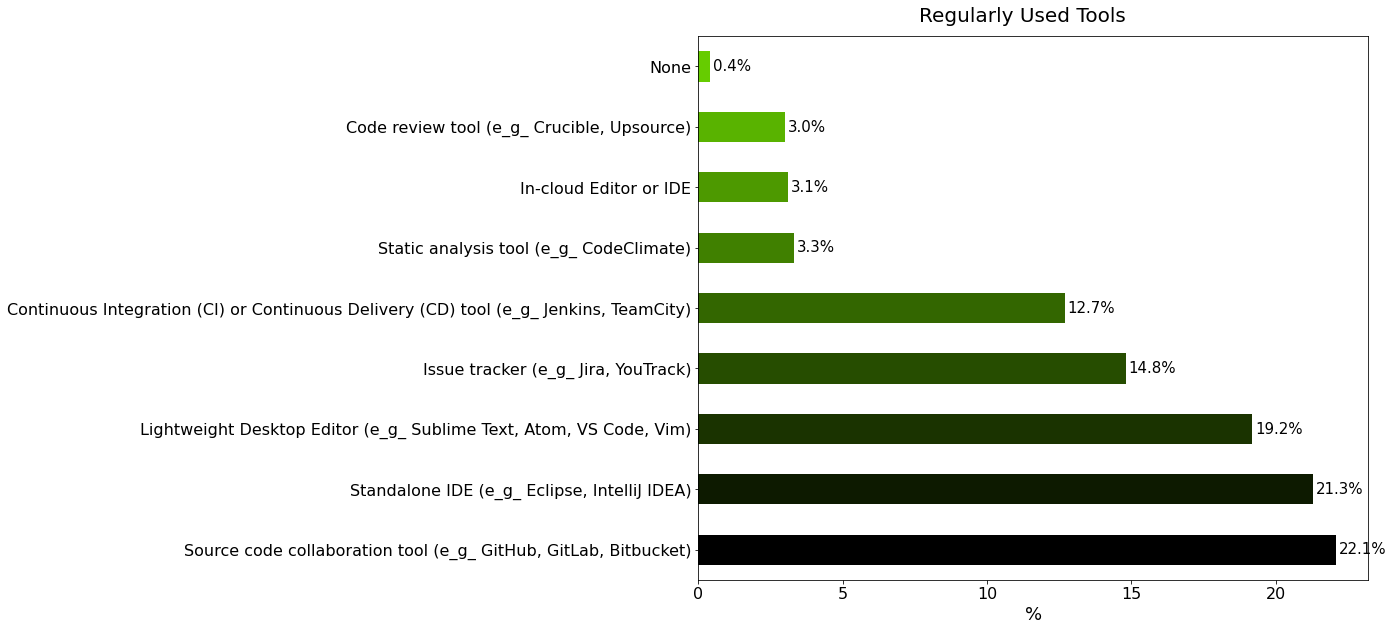

In [965]:
fig_primary_lang.show()

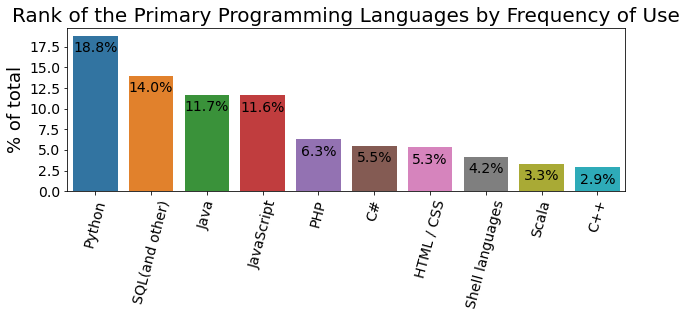

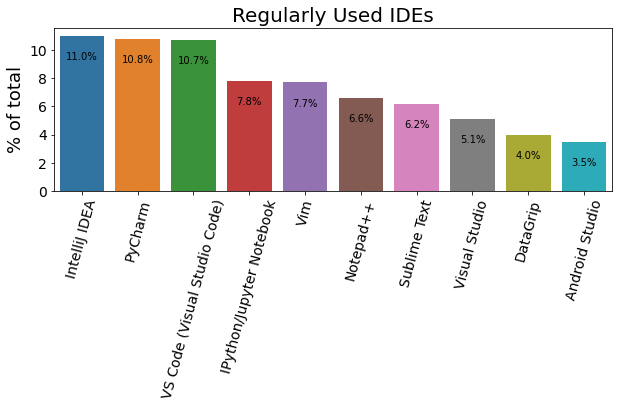

### Salaries <a id="22"></a> 

In [966]:
fig_salary_usa.show()

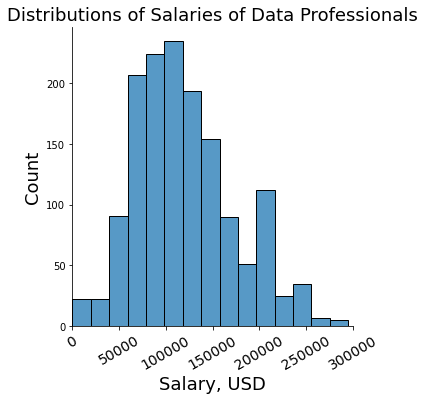

In [967]:
salary_stack_usa_no_outliers = salary_stack_usa.loc[(
    salary_stack_usa['ConvertedComp'] <= 300000) & (
    salary_stack_usa['ConvertedComp'] != 0)  ]
sns.displot(salary_stack_usa_no_outliers['ConvertedComp'], bins=15)

plt.title(
    'Distributions of Salaries of Data Professionals', fontsize=(18))
plt.xlim(0, 300000)
plt.xticks(fontsize=14, rotation=30)
plt.xlabel('Salary, USD');

In [968]:
salary_stack_usa_no_outliers.describe()

,ConvertedComp,Comp_thousands
count,1474.000000,1474.000000
mean,119554.987788,119.554988
std,52962.906983,52.962907
min,48.000000,0.048000
25%,80000.000000,80.000000
50%,110000.000000,110.000000
75%,150000.000000,150.000000
max,295000.000000,295.000000


In [969]:
print(np.percentile(salary_stack_usa_no_outliers['ConvertedComp'], [50, 75, 90]))

[110000. 150000. 200000.]


### Remote/part-time/full-time <a id="23"></a> 

In [970]:
team_distributed = data[['team_distributed']]
team_distributed = pd.DataFrame(team_distributed['team_distributed'].value_counts())
team_distributed = team_distributed.drop([''], axis=0)

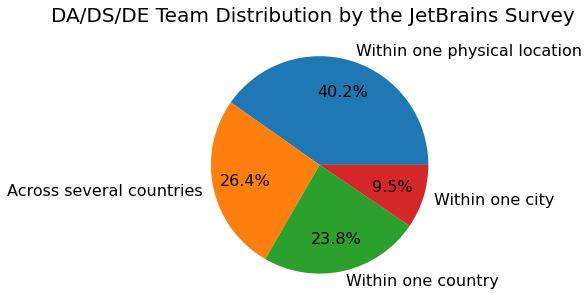

In [971]:
team_distributed.plot.pie(
    y='team_distributed', 
    figsize=(8, 5),
    autopct='%.1f%%',
    legend=None,
    fontsize=(16),
    pctdistance=0.7
)
plt.figtext(.5,.9,'DA/DS/DE Team Distribution by the JetBrains Survey', fontsize=20, ha='center')
plt.ylabel(None);

In [972]:
Employment = demogr_data['Employment']
Employment = pd.DataFrame(Employment.value_counts())

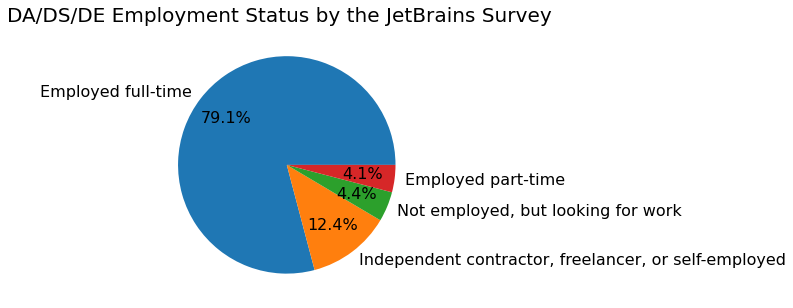

In [973]:
Employment.plot.pie(
    y='Employment', 
    figsize=(8, 5),
    autopct='%.1f%%',
    legend=None,
    fontsize=(16),
    #labels=['','', '', ''],
    pctdistance=0.7)

plt.figtext(.5,.9,'DA/DS/DE Employment Status by the JetBrains Survey', fontsize=20, ha='center')
plt.ylabel(None);

In [974]:
commute = data[['commute.I work / study from home']]
commute = pd.DataFrame(commute['commute.I work / study from home'].value_counts()).reset_index()
commute.columns = ['remote_status', 'number']
print('Worked remote', (98/772)*100)

Worked remote 12.694300518134716


### Overtime <a id="24"></a> 

In [975]:
code_weekends = data['code_weekends']

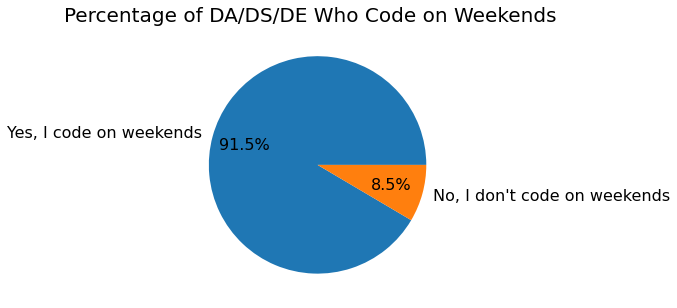

In [976]:
code_weekends_count = pd.DataFrame(code_weekends.value_counts()).reset_index()

code_weekends_count.loc[code_weekends_count['index'] == 'Yes', 'index'] = 'Yes, I code on weekends'
code_weekends_count.loc[code_weekends_count['index'] == 'No', 'index'] = "No, I don't code on weekends"
code_weekends_count
code_weekends_count = code_weekends_count.set_index('index')
code_weekends_count = code_weekends_count.drop([''], axis=0)
code_weekends_count.plot.pie(
    y='code_weekends',  
    figsize=(8, 5),
    autopct='%.1f%%',
    legend=None,
    fontsize=(16),
    pctdistance=0.7,
    )
plt.figtext(.5,.9,'Percentage of DA/DS/DE Who Code on Weekends', fontsize=20, ha='center')
plt.ylabel(None);

I set maximum working hours to 100, all bigger hours looks mistaken.

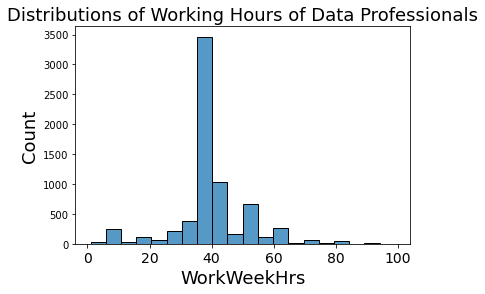

In [977]:
WorkWeekHrs = demogr_data[['WorkWeekHrs']]
WorkWeekHrs = WorkWeekHrs[WorkWeekHrs['WorkWeekHrs'] !='No answer']
WorkWeekHrs['WorkWeekHrs'] = WorkWeekHrs['WorkWeekHrs'].astype('int')
WorkWeekHrs= WorkWeekHrs.loc[WorkWeekHrs['WorkWeekHrs'] < 100]
sns.histplot(WorkWeekHrs['WorkWeekHrs'], bins=20).set_title(
    'Distributions of Working Hours of Data Professionals', fontsize=(18))
plt.xticks(fontsize=14, rotation=00);

In [978]:
WorkWeekHrs.describe()

,WorkWeekHrs
count,6951.000000
mean,40.869084
std,11.027440
min,1.000000
25%,40.000000
50%,40.000000
75%,45.000000
max,99.000000


In [979]:
NEWOvertime = demogr_data[['NEWOvertime']]
NEWOvertime = pd.DataFrame(NEWOvertime['NEWOvertime'].value_counts())
NEWOvertime = NEWOvertime.drop(['No answer'], axis=0)
NEWOvertime = NEWOvertime.reset_index()
NEWOvertime['% of total'] = (NEWOvertime['NEWOvertime']/NEWOvertime['NEWOvertime'].sum())*100
NEWOvertime['index'] = NEWOvertime['index'].str.replace('Sometimes: 1-2 days per month but less than weekly', 
                                                        'Sometimes: 1-2 days per month')
NEWOvertime['index'] = NEWOvertime['index'].str.replace('Occasionally: 1-2 days per quarter but less than monthly', 
                                                        'Occasionally: 1-2 days per quarter')
NEWOvertime

,index,NEWOvertime,% of total
0,Often: 1-2 days per week or more,2346,31.600216
1,Sometimes: 1-2 days per month,1995,26.872306
2,Occasionally: 1-2 days per quarter,1479,19.921875
3,Rarely: 1-2 days per year or less,964,12.984914
4,Never,640,8.620690


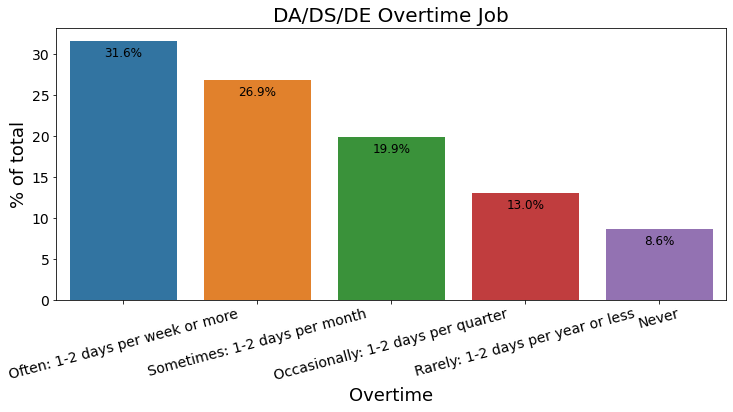

In [980]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.rcParams["axes.labelsize"] = 18
ax = sns.barplot(x="index", y="% of total", data=NEWOvertime)

for p in ax.patches:
    height = p.get_height()    
    ax.text(p.get_x() + p.get_width() / 2, 
            height -1.5,
            '{:1.1f}%'.format(height), 
            ha = 'center',   
            va = 'center',
            fontsize=12) 
plt.title("DA/DS/DE Overtime Job", fontsize=20)
plt.xticks(rotation=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Overtime');

### Demographics and social diversity <a id="25"></a> 

In [981]:
country = data[['country']]
country = pd.DataFrame(country['country'].value_counts()).reset_index()
country = country.loc[country['country'] !=0]
country.columns=['country', 'number']

In [982]:
country['country'].nunique() # countries participated

58

In [983]:
fig_pop = px.scatter_geo(country, 
                     locationmode = 'country names', 
                     color="country",
                     locations=country['country'],
                     hover_name="number", 
                     size="number",
                     projection="natural earth",
                     title='Data Professionals Residence Country (JetBrains Survey)'
                    )

fig_pop.show()

In [984]:
country_stack = demogr_data[['Country']]
country_stack_count = pd.DataFrame(country_stack['Country'].value_counts()).reset_index()
country_stack_count.columns = ['country', 'number']
country_stack_count = country_stack_count.loc[country_stack_count['number'] !=0]

In [985]:
country_stack_count['country'].nunique() # countries participated

149

In [986]:
fig_pop_stack = px.scatter_geo(country_stack_count, 
                     locationmode = 'country names', 
                     color="country",
                     locations=country_stack_count['country'],
                     hover_name="number", 
                     size="number",
                     projection="natural earth",
                     title='Data Professionals Residence Country (Stack Overflow Developer Survey)'
                    )

fig_pop_stack.show()

## Employer profile: Conclusion <a id="16c"></a>

### Industry

* More that 60% of Data professionals work for IT company.
* The biggest IT Sectors are Big-Data/Data analysis companies and IT services.
* The biggest Non IT Sectors:
    - Science
    - Education
    - Financial companies
    - Sales/Retail
    - Government and Defence
    - Medicine / Health

### Company size

* 6% of Data professionals work solely
* 10-16% of Data professionals work in small companies (2-10 employees)
* 42-45% of Data professionals work in companies with 10-500 employees
* 19-24% of Data professionals work in big companies (more than 500 employees)

### Team size

* 15% of Data professionals work on project independently
* 59% of Data professionals work on project in team from 2-7 people

### Roles/jobs

* The biggest share of data professionals participating in the survey are are Data Scientists
* The share of the Junior position is pretty big

### Stack and skills required
* Data analysis and Back-End development are the most developed applications 
* Coding is the most essential skill:
    - 39% of them code more that 32 hours a week
    -30% of them code 17-31 hours a week
* The most popular tools:
    - Source code collaboration tools (like GitHub, GitLabs, etc.)
    - IDE
    - Lightweight Desktop Editors
* The most popular programming languages:
    - Python
    - SQL
    - Java
    - JavaScript
* The most popular IDEs:
    - Intellij IDEA
    - PyCharm
    - VS Code
    - IPython/Jupyter Notebook

### Salaries

* According the JetBrains Survey, 50.7% of Data professionals have salaries less that $100k

    - 28.6% of Data professionals have salaries $100K - 200K
    
    - 5.9% have salaries more that $200K
    
* According the Stack Overflow Developer survey:

    - Median US salary: $110,000
    
    - Average US salary $120,165
    
    - Most salaries are between $60K - $120K

### Remote/part-time/full-time

* 12.7% of Data Professionals worked from home according the 2019 JetBrain Survey
* 79% work full-time
* 12% work independently
* Only 40% of teams located within one physical location

### Overtime

* 92% code on weekends
* 32% work overtime 1-2 days per week or more
* 22% work overtime rarely or never

### Demopraphics and social diversity

* Most of the data professionals participated in the surveys were from the United States and India. 
* JetBrain surveyed 870 data professionals  from 58 countries 
* Stack Overflow surveyed 8726 data professionals from 149 countries
* FreeCodeCamp surveyed 2607 new data engineers and 3542 new data scientists


## Step 5. Demographics and Social: How are the demographics of the tech industry distributed? How are the demographics of individual roles/positions distributed? Look at the following parameters <a id="26"></a> 

### Age <a id="27"></a>

In [987]:
age = data[['position_level', 'age_range']]

In [988]:
age_count = pd.DataFrame(age['age_range'].value_counts()).reset_index()
age_count.columns = ['age_range', 'number']
age_count = age_count.loc[[6, 4, 1, 0, 2, 3, 5, ], :]
age_count['% of total'] = (age_count['number'] / age_count['number'].sum())*100
age_count

,age_range,number,% of total
6,17 or younger,1,0.114943
4,18-20,26,2.988506
1,21-29,320,36.781609
0,30-39,331,38.045977
2,40-49,146,16.781609
3,50-59,36,4.137931
5,60 or older,10,1.149425


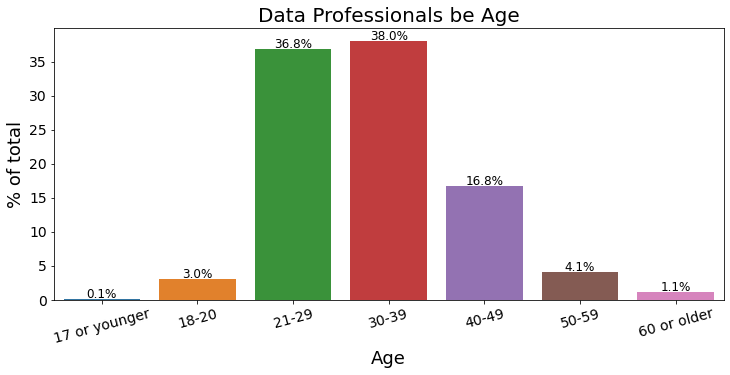

In [989]:
fig, ax = plt.subplots(figsize=(12, 5))
plt.rcParams["axes.labelsize"] = 18
ax = sns.barplot(x="age_range", y="% of total", data=age_count)

for p in ax.patches:
    height = p.get_height()    
    ax.text(p.get_x() + p.get_width() / 2, 
            height +0.7,
            '{:1.1f}%'.format(height), 
            ha = 'center',   
            va = 'center',
            fontsize=12) 
plt.title("Data Professionals be Age", fontsize=20)
plt.xticks(rotation=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Age');

In [990]:
age_pivot = age.pivot_table(index='position_level', columns='age_range', aggfunc='size')
age_pivot.columns = ['17 or younger', '18-20', '21-29', '30-39', '40-49', '50-59', '60 or older']
age_pivot = age_pivot.drop(['', 'Other'], axis=0)

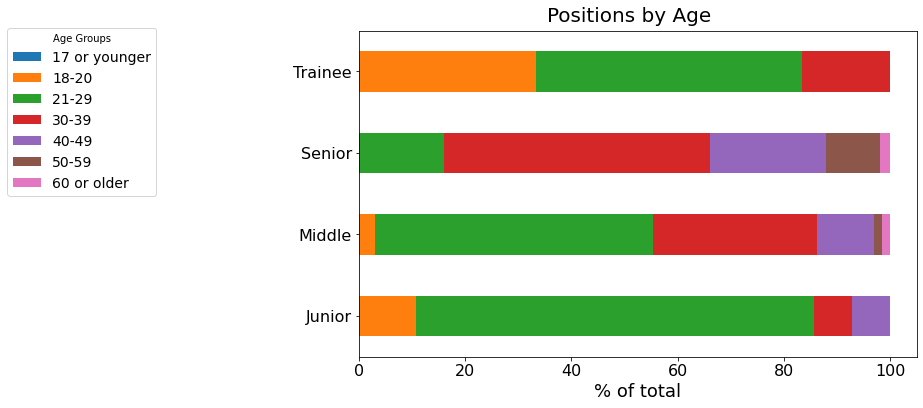

In [991]:
age_pivot = age_pivot.apply(lambda x: x*100/sum(x), axis=1)
age_pivot.plot.barh(
    stacked=True, 
    rot=0, 
    figsize=(10,6), 
    fontsize=(16),
    )
plt.legend(
    loc='upper right', 
    bbox_to_anchor=(-0.35, 1.03),
    fontsize=14,
    title="Age Groups")
plt.figtext(.5,.9,
            'Positions by Age', 
            fontsize=20, 
            ha='center')
plt.ylabel(None)
plt.xlabel('% of total');

In [992]:
age_p = age_stack[['job_role', 'age_category']].pivot_table(
    index='job_role', columns='age_category', aggfunc='size')
age_p = age_p.drop(columns='no answer')
age_p = age_p.fillna(0)

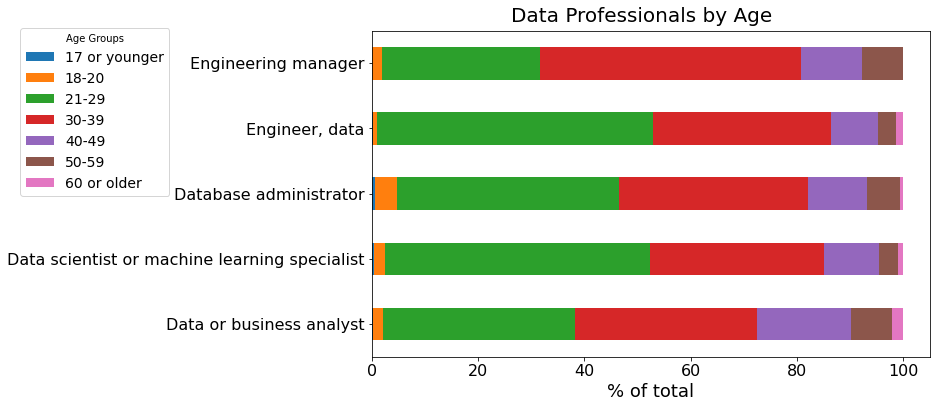

In [993]:
age_p = age_p.apply(lambda x: x*100/sum(x), axis=1)
age_p.plot.barh(
    stacked=True, 
    rot=0, 
    figsize=(10,6), 
    fontsize=(16))
plt.legend(
    loc='upper right', 
    bbox_to_anchor=(-0.35, 1.03),
    fontsize=14,
    title="Age Groups")
plt.figtext(.5,.9,
            'Data Professionals by Age', 
            fontsize=20, 
            ha='center')
plt.ylabel(None)
plt.xlabel('% of total');

In [994]:
new_coder_age = survey[['job_intr_dataengn', 'job_intr_datasci', 'age']]

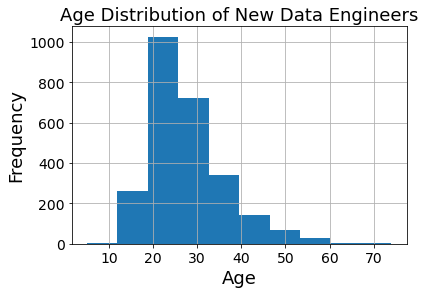

In [995]:
new_coder_age_job_intr_dataengn = new_coder_age.loc[new_coder_age['job_intr_dataengn'] ==1]

new_coder_age_job_intr_dataengn = new_coder_age_job_intr_dataengn.drop(columns=['job_intr_datasci'])
new_coder_age_job_intr_dataengn = new_coder_age_job_intr_dataengn.loc[new_coder_age_job_intr_dataengn['age'] != None]
new_coder_age_job_intr_dataengn['age'].hist().set_title('Age Distribution of New Data Engineers', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency');

In [996]:
new_coder_age_job_intr_dataengn['age'].describe()

count    2607.000000
mean       27.416571
std         8.629262
min         5.000000
25%        21.000000
50%        26.000000
75%        32.000000
max        74.000000
Name: age, dtype: float64

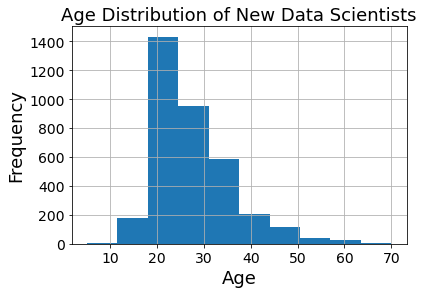

In [997]:
new_coder_age_job_intr_datasci = new_coder_age.loc[new_coder_age['job_intr_datasci'] ==1]

new_coder_age_job_intr_datasci = new_coder_age_job_intr_datasci.drop(columns=['job_intr_datasci'])
new_coder_age_job_intr_datasci = new_coder_age_job_intr_datasci.loc[new_coder_age_job_intr_datasci['age'] != None]
new_coder_age_job_intr_datasci['age'].hist().set_title('Age Distribution of New Data Scientists', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency');

In [998]:
new_coder_age_job_intr_datasci['age'].describe()

count    3542.000000
mean       27.256070
std         8.491814
min         5.000000
25%        21.000000
50%        25.000000
75%        31.000000
max        70.000000
Name: age, dtype: float64

### Gender <a id="28"></a>

In [999]:
gender_stack = demogr_data[['job_role', 'Gender']]

In [1000]:
gender_stack['Gender'].unique()

['Man', 'No answer', 'Woman', 'Man;Non-binary, genderqueer, or gender non-co..., 'Woman;Non-binary, genderqueer, or gender non-..., 'Non-binary, genderqueer, or gender non-confor..., 'Woman;Man;Non-binary, genderqueer, or gender ..., 'Woman;Man']
Categories (8, object): ['Man', 'No answer', 'Woman', 'Man;Non-binary, genderqueer, or gender non-co..., 'Woman;Non-binary, genderqueer, or gender non-..., 'Non-binary, genderqueer, or gender non-confor..., 'Woman;Man;Non-binary, genderqueer, or gender ..., 'Woman;Man']

In [1001]:
gender_stack_p = gender_stack.pivot_table(index='job_role', columns='Gender', aggfunc='size')
gender_stack_p.columns = ['Man', 'Man;Non-binary, genderqueer, or gender non-conforming', 'No answer', 
                          'Non-binary, genderqueer, or gender non-conforming', 'Woman', 'Woman;Man',
                          'Woman;Man;Non-binary, genderqueer, or gender non-conforming', 
                          'Woman;Non-binary, genderqueer, or gender non-conforming']
gender_stack_p['Other gender'] = gender_stack_p[
    'Man;Non-binary, genderqueer, or gender non-conforming'] + gender_stack_p[
    'Non-binary, genderqueer, or gender non-conforming'] + gender_stack_p['Woman;Man'] + gender_stack_p[
    'Woman;Man;Non-binary, genderqueer, or gender non-conforming'] + gender_stack_p[
    'Woman;Non-binary, genderqueer, or gender non-conforming']
gender_stack_p = gender_stack_p.drop(columns=['Man;Non-binary, genderqueer, or gender non-conforming',  
                          'Non-binary, genderqueer, or gender non-conforming', 'Woman;Man',
                          'Woman;Man;Non-binary, genderqueer, or gender non-conforming', 
                          'Woman;Non-binary, genderqueer, or gender non-conforming'])
gender_stack_p = gender_stack_p.drop(columns='No answer')
#gender_stack_p.reset_index()


In [1002]:
fig = make_subplots(
    rows=2, cols=2,   
    specs=[[{'type':'domain'},        None      ],
           [{'type':'domain'}, {'type':'domain'}]],
           
    subplot_titles=['Man', 'Woman', 'Other gender']
)
fig.add_trace(go.Pie(
    labels=gender_stack_p.index, 
    values=gender_stack_p['Man'], 
    scalegroup='one',
    hole=0.7,
    name="Man"), 1, 1)
fig.add_trace(go.Pie(
    labels=gender_stack_p.index, 
    values=gender_stack_p['Woman'], 
    scalegroup='one',
    hole=0.6,
    name="Woman"), 2, 1)
fig.add_trace(go.Pie(
    labels=gender_stack_p.index, 
    values=gender_stack_p['Other gender'], 
    scalegroup='one',
    hole=0.4,
    name="Database administrator"), 2, 2)

fig.update_layout(title_text='Data Professionals by Gender',
                  legend=dict(x=0.9, y=1, font=dict( size=15)),
                  font_size = 12,
                  margin=dict(l=50, r=50, t=50, b=50))
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=0.5)))
fig.show()

In [1003]:
new_coder_gender = survey[['job_intr_dataengn', 'job_intr_datasci', 'gender']]

In [1004]:
new_coder_gender_dataengn = new_coder_gender.loc[new_coder_gender['job_intr_dataengn'] ==1]
new_coder_gender_dataengn = new_coder_gender_dataengn.drop(columns=['job_intr_datasci'])
new_coder_gender_dataengn = new_coder_gender_dataengn.loc[new_coder_gender_dataengn['gender'] != None]
new_coder_gender_dataengn = pd.DataFrame(new_coder_gender_dataengn['gender'].value_counts()).reset_index()
new_coder_gender_dataengn.columns = ['gender', 'number']

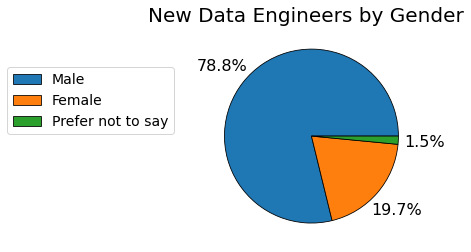

In [1005]:
new_coder_gender_dataengn.plot.pie(
    y='number',
    autopct='%.1f%%',
    legend=True,
    fontsize=(16),
    labels=['','', ''],
    pctdistance=1.3, 
    wedgeprops={"edgecolor":"k",'linewidth': 0.8})

plt.legend(labels=new_coder_gender_dataengn['gender'], bbox_to_anchor=(-0.1, 0.85),
           fontsize=14)
plt.figtext(.5,.9,'New Data Engineers by Gender', fontsize=20, ha='center')
plt.ylabel(None);

In [1006]:
new_coder_gender_datasci = new_coder_gender.loc[new_coder_gender['job_intr_datasci'] ==1]
new_coder_gender_datasci = new_coder_gender_datasci.drop(columns=['job_intr_dataengn'])
new_coder_gender_datasci = new_coder_gender_datasci.loc[new_coder_gender_datasci['gender'] != None]
new_coder_gender_datasci = pd.DataFrame(new_coder_gender_datasci['gender'].value_counts()).reset_index()
new_coder_gender_datasci.columns = ['gender', 'number']

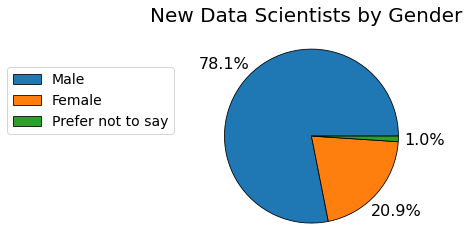

In [1007]:

new_coder_gender_datasci.plot.pie(
    y='number',
    autopct='%.1f%%',
    legend=True,
    fontsize=(16),
    labels=['','', ''],
    pctdistance=1.3,
    wedgeprops={"edgecolor":"k",'linewidth': 0.8}
)
plt.legend(labels=new_coder_gender_datasci['gender'], bbox_to_anchor=(-0.1, 0.85),
           fontsize=14)
plt.figtext(.5,.9,'New Data Scientists by Gender', fontsize=20, ha='center')
plt.ylabel(None);

### Race <a id="29"></a>

In [1008]:
ethnicity_stack = demogr_data[['job_role', 'Ethnicity']]
ethnicity_stack.shape[0]

8726

In [1009]:

def Race(lemmas):
    if 'Black or of African descent' in lemmas:
        return  'Black or of African descent'
    if 'East Asian' in lemmas:
        return  'East Asian'
    if 'Pacific Islander' in lemmas or 'Indigenous' in lemmas:
        return  'Pacific Islander'
    if 'Hispanic or Latino' in lemmas :
        return  'Hispanic or Latino'
    if 'South Asian' in lemmas :
        return  'South Asian'
    if 'Middle Eastern' in lemmas :
        return  'Middle Eastern'
    if 'White or of European descent' in lemmas :
        return  'White or of European descent'

In [1010]:
ethnicity_stack['Race'] = ethnicity_stack['Ethnicity'].apply(Race)

<ipython-input-1010-c43a66e8b7ab>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1011]:
ethnicity_stack_p = ethnicity_stack.pivot_table(index='job_role', columns='Race', values='Race', aggfunc='size')
ethnicity_stack_p = ethnicity_stack_p.apply(lambda x: x*100/sum(x), axis=1)

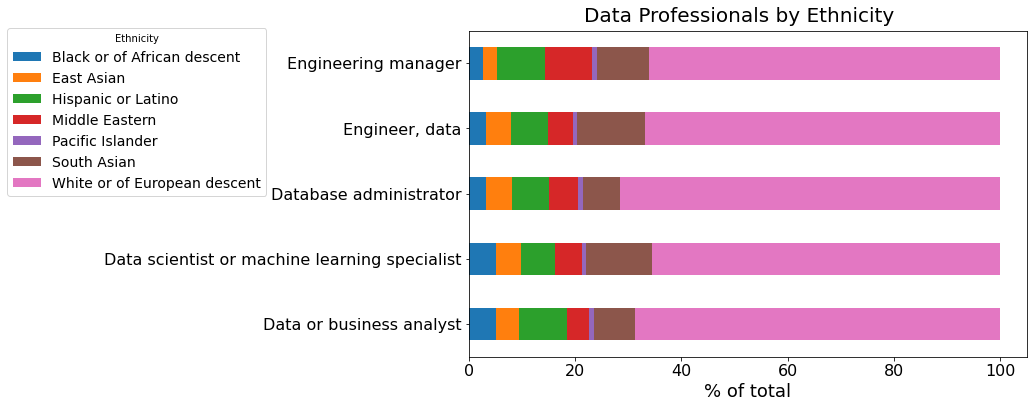

In [1012]:
ethnicity_stack_p.plot.barh(
    stacked=True, 
    rot=0, 
    figsize=(10,6), 
    fontsize=(16))
plt.legend(
    loc='upper right', 
    bbox_to_anchor=(-0.35, 1.03),
    fontsize=14,
    title='Ethnicity')
plt.figtext(.5,.9,
            'Data Professionals by Ethnicity', 
            fontsize=20, 
            ha='center')
plt.ylabel(None)
plt.xlabel('% of total');

### Education <a id="30"></a>

In [1013]:
background_stack = demogr_data[['job_role', 'NEWEdImpt', 'UndergradMajor']]

In [1014]:
background_stack_dev_edImp = pd.DataFrame(background_stack['NEWEdImpt'].value_counts())
background_stack_dev_edImp.columns = ['number']
background_stack_dev_edImp['% of total'] = (background_stack_dev_edImp['number']
                                            /background_stack_dev_edImp['number'].sum())*100
background_stack_dev_edImp = background_stack_dev_edImp.loc[['Critically important', 'Very important', 'Fairly important',
                                                            'Somewhat important', 'Not at all important/not necessary']]
background_stack_dev_edImp

,number,% of total
Critically important,1252,14.347926
Very important,2348,26.908091
Fairly important,1977,22.656429
Somewhat important,1582,18.129727
Not at all important/not necessary,1047,11.998625


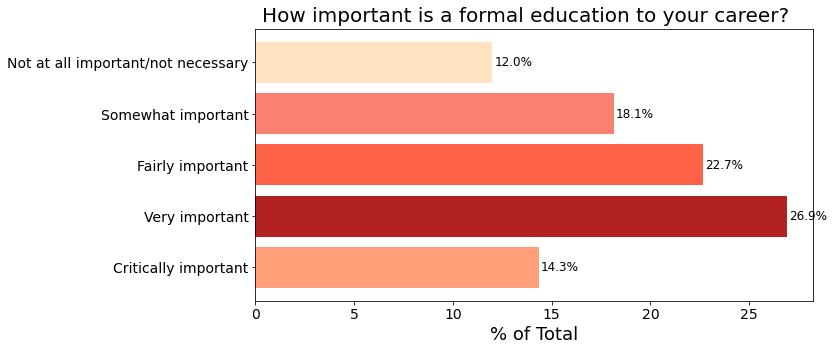

In [1015]:
colors4 = ['lightsalmon',  'firebrick', 'tomato', 'salmon', 'bisque']
colors3 = ['seagreen', 'green','darkgreen', 'olivedrab' ,'mediumspringgreen', 'palegreen']

ax = background_stack_dev_edImp['% of total'].plot.barh(figsize=(10, 5),  
    fontsize=(14), legend=None, color=colors4,  width=0.8)

for p in ax.patches:
    width = p.get_width()    
    ax.text(width +0.1,      
            p.get_y() + p.get_height() / 2, 
            '{:1.1f}%'.format(width), 
            ha = 'left',   
            va = 'center',
            fontsize=12)  
plt.figtext(.5,.9,'How important is a formal education to your career?', fontsize=20, ha='center')
plt.xlabel('% of Total')
plt.ylabel(None);

In [1016]:
background_stack_dev_undergrade = pd.DataFrame(background_stack['UndergradMajor'].value_counts()).reset_index()
background_stack_dev_undergrade.columns = ['reply', 'number']

In [1017]:
def edu(lemmas):
    if 'electrical' in lemmas or 'natural' in lemmas or 'Mathematics' in lemmas \
    or 'business' in lemmas or 'humanities' in lemmas or 'social' in lemmas or 'performing' in lemmas or'health' in lemmas:
        return  'Non-IT Major'
    

In [1018]:
background_stack_dev_undergrade['major'] = background_stack_dev_undergrade['reply'].apply(edu)

background_stack_dev_undergrade['major'] = background_stack_dev_undergrade['major'].fillna('')
background_stack_dev_undergrade.loc[background_stack_dev_undergrade['major'] == '', 'major'] = \
background_stack_dev_undergrade['reply']

In [1019]:
fig_new_undergrade = go.Figure(
    data=[go.Pie(labels=background_stack_dev_undergrade['major'], 
                 values=background_stack_dev_undergrade['number'], 
                 hole=0.8
                  )])
fig_new_undergrade.update_layout(uniformtext_minsize=15, uniformtext_mode='hide',
                              legend=dict(x=1, y=0.8, font=dict(size=12)),
                              margin=dict(l=15, r=15, t=15, b=15),
                              height = 800,
                              width = 800,
                              autosize = False, 
                              annotations=[dict(text='Data Professionals Undergraduate Major', 
                                                   x=0.5, y=0.5, font_size=11, showarrow=False)])
fig_new_undergrade.update_traces(marker=dict(colors=colors, line=dict(color='#000', width=0.5)))
fig_new_undergrade.show()

### Disability status <a id="31"></a>

In [1020]:
new_coder_disability = survey[['ID', 'is_recv_disab_bnft']]

In [1021]:
new_coder_disability.shape[0]

28397

In [1022]:
new_coder_disability_count = pd.DataFrame(new_coder_disability['is_recv_disab_bnft'].value_counts()).reset_index()
new_coder_disability_count.columns = ['reply', 'number']

new_coder_disability_count.loc[new_coder_disability_count['reply'] == 0, 'reply'] = "Don't receive disability benefits"
new_coder_disability_count.loc[new_coder_disability_count['reply'] == 1, 'reply'] = "Receive disability benefits"

In [1023]:
fig_disability = go.Figure(
    data=[go.Pie(labels=new_coder_disability_count['reply'], 
                 values=new_coder_disability_count['number'], 
                 title='New Coders Receive disability benefits',
                 titlefont={'size':[20]},
                 hole=0.8
                  )])
fig_disability.update_layout(uniformtext_minsize=15, uniformtext_mode='hide',
                              legend=dict(font=dict(size=16)),
                              annotations=[dict(text='New Coders Receive disability benefits', 
                                                   x=0.5, y=0.5, font_size=12, showarrow=False)])
fig_disability.update_traces(marker=dict(colors=colors, line=dict(color='#000', width=0.5)))
fig_disability.show()

## Demographics and Social: Conclusion <a id="26c"></a>

### Age

* Almost 75% of surveyed data professionals are 21-39 year old 16.8% - 40-49 year old

* About 13.3% of Junior position are people from 30-49 years old About 16.7% all Trainees are people from 30-39 years old

* DA/BA have the biggest share of the people older than 30 years old

### Gender

* Absolute majority are men

* More than 50% of all women and people with different gender in data professions are Data Scientists

* Absolute majority of new data professionals are men also

* Share of women in new data professionals are bigger than in current.

### Race and ethnicity

* About ⅔ of all data professionals are white

### Education

* 35.3% of surveyed data professionals have non-IT major
* 12% of surveyed data professionals said that formal education is not important
* 41.2% of surveyed data professionals said that formal education is critically and very important

### Disability status

* Almost 3% of of surveyed data professionals said that they receive disability benefits


## Conclusion <a id="35"></a>

* The most popular data related job paths: DS/Machine Learning, DA/BA, Data Engineer
* Coding is the most essential skill of the data professional: 39% of them code more that 32 hours a week
* The most popular tools used by data professionals: Source code collaboration tools, IDE, Lightweight Desktop Editors
* The most used programming languages are Python and SQL
* Average salary of the Data professionals in the US are higher than $100K
* 7.6% of Data professionals have experience less than year
* About 11.5% of DS are Independent contractors and about 15% of DA/BA are Independent contractors. 10-16% of Data professionals work in small companies (2-10 employees)
* 85% Data professionals work on the projects in a team
* Formal education is important but not crucial, pretty big share of the data professionals don’t have formal education. 
* Formal education is the most important for Data Scientists
* Most Data Professionals learn from 1 to 8 hours a week
* Majority of the Data professionals satisfied with the job and do not look new job


## Recommendations
1. There is a lot of opportunities in the Data related job marker. 
2. People who plan to enter the Data related job market need to be ready to learn a lot and be able to work in a team
3. Data professionals have different educational backgrounds and diverse age groups.
4. Older people have opportunity to enter this job market: about 13.3% of Junior position are people from 30-49 years old, about 16.7% all Trainees are people from 30-39 years old
5. The biggest Non IT Sectors hiring data professionals:
    * Science
    * Education
    * Financial companies
    * Sales/Retail
    * Government and Defence
    * Medicine / Health